In [25]:
import sys
import gym
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
# Set plotting options
%matplotlib inline
plt.style.use('ggplot')
# np.set_printoptions(precision=3, linewidth=120)

# !python -m pip install pyvirtualdisplay
# from pyvirtualdisplay import Display
# display = Display(backend='xephyr')
# display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

In [26]:
# Create an environment and set random seed
env = gym.make('MountainCar-v0', render_mode="rgb_array")
env.reset(seed=42)

(array([-0.4452088,  0.       ], dtype=float32), {})

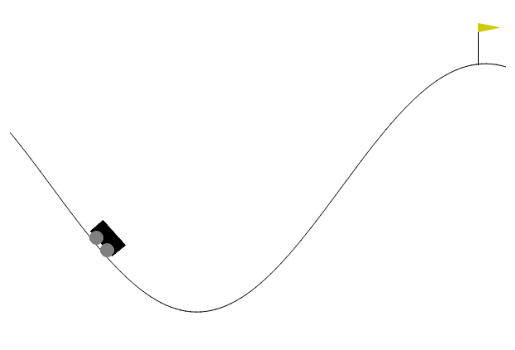

In [27]:
img = plt.imshow(env.render())
for t in range(1000):
    action = env.action_space.sample()
    img.set_data(env.render())
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    state, reward, done, dond, done = env.step(action)
    if done:
        print('Score: ', t+1)
        break
        
env.close()

In [6]:
# Explore state (observation) space
print("State space:", env.observation_space)
print("- low:", env.observation_space.low)
print("- high:", env.observation_space.high)

State space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
- low: [-1.2  -0.07]
- high: [0.6  0.07]


In [7]:
# Generate some samples from the state space 
print("State space samples:")
print(np.array([env.observation_space.sample() for i in range(10)]))

State space samples:
[[-8.2548851e-01  3.5030104e-02]
 [-1.0158240e+00 -2.5168462e-02]
 [-6.2207609e-01  3.1263363e-02]
 [ 4.0067375e-01 -6.5426469e-02]
 [ 3.2848084e-01 -2.3777347e-02]
 [-1.1832185e+00 -2.3713361e-02]
 [-9.0852576e-01  4.5088824e-02]
 [-1.1627684e-04  1.2113741e-02]
 [-7.0749575e-01  2.4080904e-02]
 [ 4.2953786e-01  6.5882415e-02]]


In [8]:
# Explore the action space
print("Action space:", env.action_space)

# Generate some samples from the action space
print("Action space samples:")
print(np.array([env.action_space.sample() for i in range(10)]))

Action space: Discrete(3)
Action space samples:
[1 1 1 1 2 0 1 1 0 2]


In [9]:
def create_uniform_grid(low, high, bins=(10, 10)):
    """Define a uniformly-spaced grid that can be used to discretize a space.
    
    Parameters
    ----------
    low : array_like
        Lower bounds for each dimension of the continuous space.
    high : array_like
        Upper bounds for each dimension of the continuous space.
    bins : tuple
        Number of bins along each corresponding dimension.
    
    Returns
    -------
    grid : list of array_like
        A list of arrays containing split points for each dimension.
    """

    grid = [np.linspace(low[dim], high[dim], bins[dim] + 1)[1:-1] for dim in range(len(bins))]
    print("Uniform grid: [<low>, <high>] / <bins> => <splits>")
    for l, h, b, splits in zip(low, high, bins, grid):
        print("    [{}, {}] / {} => {}".format(l, h, b, splits))
    return grid



# Test the function
low = [-1.0, -5.0]
high = [1.0, 5.0]
create_uniform_grid(low, high) 

Uniform grid: [<low>, <high>] / <bins> => <splits>
    [-1.0, 1.0] / 10 => [-0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8]
    [-5.0, 5.0] / 10 => [-4. -3. -2. -1.  0.  1.  2.  3.  4.]


[array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8]),
 array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])]

In [10]:
def discretize(sample, grid):
    """Discretize a sample as per given grid.
    
    Parameters
    ----------
    sample : array_like
        A single sample from the (original) continuous space.
    grid : list of array_like
        A list of arrays containing split points for each dimension.
    
    Returns
    -------
    discretized_sample : array_like
        A sequence of integers with the same number of dimensions as sample.
    """
    return list(int(np.digitize(s, g)) for s, g in zip(sample, grid))  # apply along each dimension


# Test with a simple grid and some samples
grid = create_uniform_grid([-1.0, -5.0], [1.0, 5.0])
samples = np.array(
    [[-1.0 , -5.0],
     [-0.81, -4.1],
     [-0.8 , -4.0],
     [-0.5 ,  0.0],
     [ 0.2 , -1.9],
     [ 0.8 ,  4.0],
     [ 0.81,  4.1],
     [ 1.0 ,  5.0]])
discretized_samples = np.array([discretize(sample, grid) for sample in samples])
print("\nSamples:", repr(samples), sep="\n")
print("\nDiscretized samples:", repr(discretized_samples), sep="\n")

Uniform grid: [<low>, <high>] / <bins> => <splits>
    [-1.0, 1.0] / 10 => [-0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8]
    [-5.0, 5.0] / 10 => [-4. -3. -2. -1.  0.  1.  2.  3.  4.]

Samples:
array([[-1.  , -5.  ],
       [-0.81, -4.1 ],
       [-0.8 , -4.  ],
       [-0.5 ,  0.  ],
       [ 0.2 , -1.9 ],
       [ 0.8 ,  4.  ],
       [ 0.81,  4.1 ],
       [ 1.  ,  5.  ]])

Discretized samples:
array([[0, 0],
       [0, 0],
       [1, 1],
       [2, 5],
       [5, 3],
       [9, 9],
       [9, 9],
       [9, 9]])


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3553: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


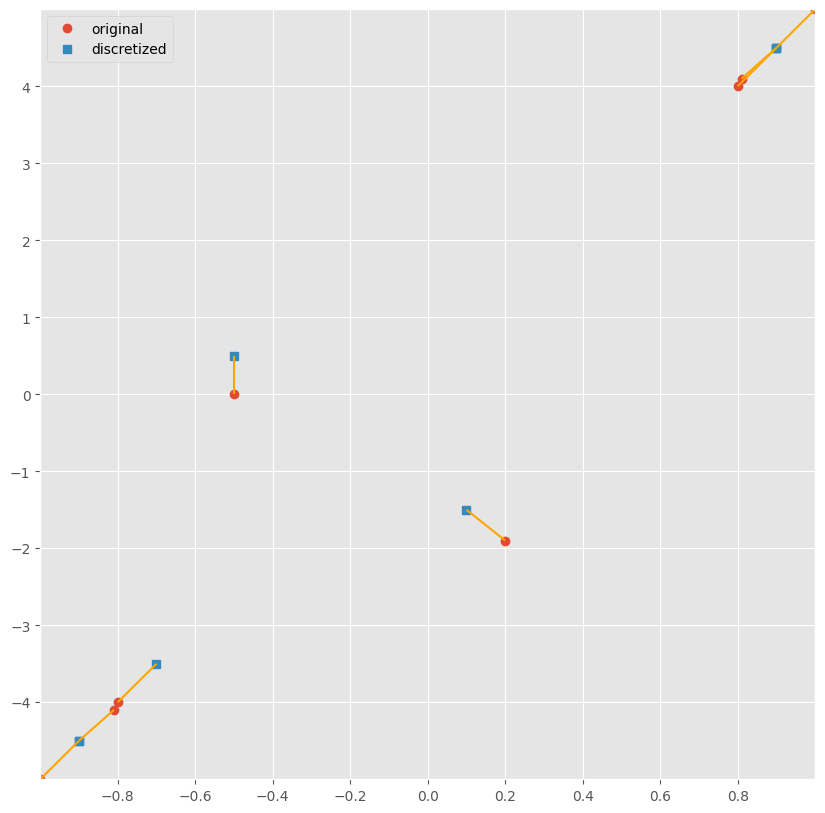

In [11]:
import matplotlib.collections as mc

def visualize_samples(samples, discretized_samples, grid, low=None, high=None):
    """Visualize original and discretized samples on a given 2-dimensional grid."""

    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Show grid
    ax.xaxis.set_major_locator(plt.FixedLocator(grid[0]))
    ax.yaxis.set_major_locator(plt.FixedLocator(grid[1]))
    ax.grid(True)
    
    # If bounds (low, high) are specified, use them to set axis limits
    if low is not None and high is not None:
        ax.set_xlim(low[0], high[0])
        ax.set_ylim(low[1], high[1])
    else:
        # Otherwise use first, last grid locations as low, high (for further mapping discretized samples)
        low = [splits[0] for splits in grid]
        high = [splits[-1] for splits in grid]

    # Map each discretized sample (which is really an index) to the center of corresponding grid cell
    grid_extended = np.hstack((np.array([low]).T, grid, np.array([high]).T))  # add low and high ends
    grid_centers = (grid_extended[:, 1:] + grid_extended[:, :-1]) / 2  # compute center of each grid cell
    locs = np.stack(grid_centers[i, discretized_samples[:, i]] for i in range(len(grid))).T  # map discretized samples

    ax.plot(samples[:, 0], samples[:, 1], 'o')  # plot original samples
    ax.plot(locs[:, 0], locs[:, 1], 's')  # plot discretized samples in mapped locations
    ax.add_collection(mc.LineCollection(list(zip(samples, locs)), colors='orange'))  # add a line connecting each original-discretized sample
    ax.legend(['original', 'discretized'])

    
visualize_samples(samples, discretized_samples, grid, low, high)

In [12]:
# Create a grid to discretize the state space
state_grid = create_uniform_grid(env.observation_space.low, env.observation_space.high, bins=(10, 10))
state_grid

Uniform grid: [<low>, <high>] / <bins> => <splits>
    [-1.2000000476837158, 0.6000000238418579] / 10 => [-1.02000004 -0.84000003 -0.66000003 -0.48000002 -0.30000001 -0.12
  0.06        0.24000001  0.42000002]
    [-0.07000000029802322, 0.07000000029802322] / 10 => [-0.056 -0.042 -0.028 -0.014  0.     0.014  0.028  0.042  0.056]


[array([-1.02000004, -0.84000003, -0.66000003, -0.48000002, -0.30000001,
        -0.12      ,  0.06      ,  0.24000001,  0.42000002]),
 array([-0.056, -0.042, -0.028, -0.014,  0.   ,  0.014,  0.028,  0.042,
         0.056])]

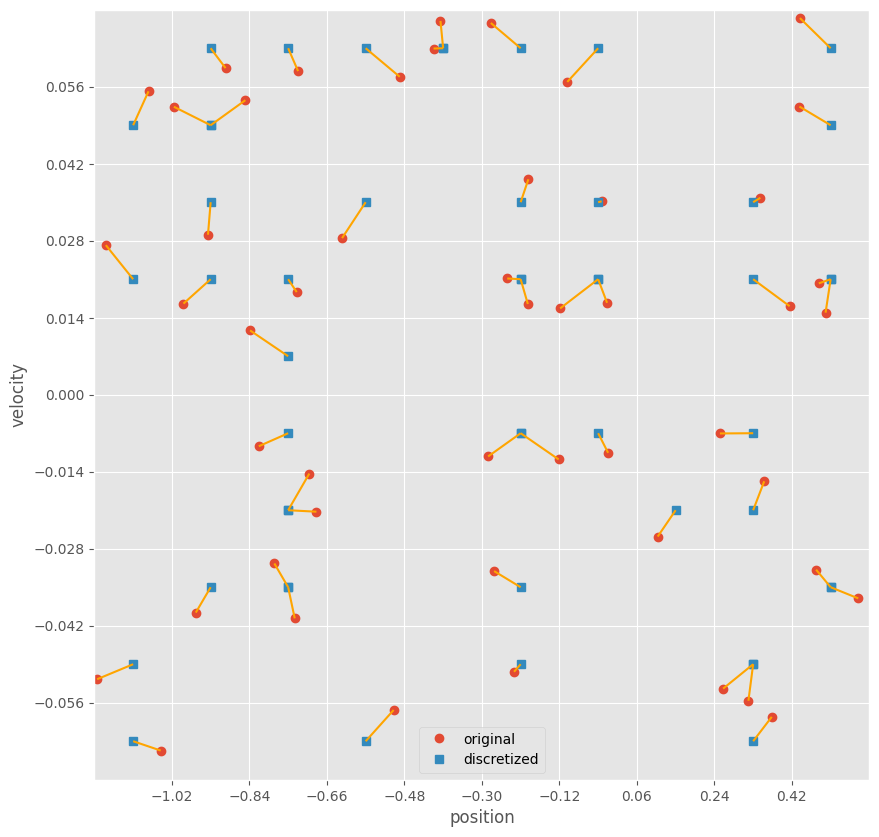

In [13]:
# Obtain some samples from the space, discretize them, and then visualize them
state_samples = np.array([env.observation_space.sample() for i in range(50)])
discretized_state_samples = np.array([discretize(sample, state_grid) for sample in state_samples])
visualize_samples(state_samples, discretized_state_samples, state_grid,
                  env.observation_space.low, env.observation_space.high)
plt.xlabel('position'); plt.ylabel('velocity');  # axis labels for MountainCar-v0 state space

In [14]:
class QLearningAgent:
    """Q-Learning agent that can act on a continuous state space by discretizing it."""

    def __init__(self, env, state_grid, alpha=0.02, gamma=0.99,
                 epsilon=1.0, epsilon_decay_rate=0.9995, min_epsilon=.01, seed=505):
        """Initialize variables, create grid for discretization."""
        # Environment info
        self.env = env
        self.state_grid = state_grid
        self.state_size = tuple(len(splits) + 1 for splits in self.state_grid)  # n-dimensional state space
        self.action_size = self.env.action_space.n  # 1-dimensional discrete action space
        self.seed = np.random.seed(seed)
        print("Environment:", self.env)
        print("State space size:", self.state_size)
        print("Action space size:", self.action_size)
        
        # Learning parameters
        self.alpha = alpha  # learning rate
        self.gamma = gamma  # discount factor
        self.epsilon = self.initial_epsilon = epsilon  # initial exploration rate
        self.epsilon_decay_rate = epsilon_decay_rate # how quickly should we decrease epsilon
        self.min_epsilon = min_epsilon
        
        # Create Q-table
        self.q_table = np.zeros(shape=(self.state_size + (self.action_size,)))
        print("Q table size:", self.q_table.shape)

    def preprocess_state(self, state):
        """Map a continuous state to its discretized representation."""
        if isinstance(state, tuple):
            return tuple(discretize(state[0], self.state_grid))
        return tuple(discretize(state, self.state_grid))

    def reset_episode(self, state):
        """Reset variables for a new episode."""
        # Gradually decrease exploration rate
        self.epsilon *= self.epsilon_decay_rate
        self.epsilon = max(self.epsilon, self.min_epsilon)

        # Decide initial action
        self.last_state = self.preprocess_state(state)
        self.last_action = np.argmax(self.q_table[self.last_state])
        return self.last_action
    
    def reset_exploration(self, epsilon=None):
        """Reset exploration rate used when training."""
        self.epsilon = epsilon if epsilon is not None else self.initial_epsilon

    def act(self, state, reward=None, done=None, mode='train'):
        """Pick next action and update internal Q table (when mode != 'test')."""
        state = self.preprocess_state(state)
        if mode == 'test':
            # Test mode: Simply produce an action
            action = np.argmax(self.q_table[state])
        else:
            # Train mode (default): Update Q table, pick next action
            # Note: We update the Q table entry for the *last* (state, action) pair with current state, reward
            self.q_table[self.last_state + (self.last_action,)] += self.alpha * \
                (reward + self.gamma * max(self.q_table[state]) - self.q_table[self.last_state + (self.last_action,)])

            # Exploration vs. exploitation
            do_exploration = np.random.uniform(0, 1) < self.epsilon
            if do_exploration:
                # Pick a random action
                action = np.random.randint(0, self.action_size)
            else:
                # Pick the best action from Q table
                action = np.argmax(self.q_table[state])

        # Roll over current state, action for next step
        self.last_state = state
        self.last_action = action
        return action

    
q_agent = QLearningAgent(env, state_grid)

Environment: <TimeLimit<OrderEnforcing<PassiveEnvChecker<MountainCarEnv<MountainCar-v0>>>>>
State space size: (10, 10)
Action space size: 3
Q table size: (10, 10, 3)


In [15]:
def run(agent, env, num_episodes=20000, mode='train'):
    """Run agent in given reinforcement learning environment and return scores."""
    scores = []
    max_avg_score = -np.inf
    for i_episode in tqdm(range(1, num_episodes+1)):
        # Initialize episode
        state = env.reset()
        action = agent.reset_episode(state)
        total_reward = 0
        done = False

        # Roll out steps until done
        while not done:
            state, reward, done, info, _ = env.step(action)
            total_reward += reward
            action = agent.act(state, reward, done, mode)

        # Save final score
        scores.append(total_reward)
        
        # Print episode stats
        if mode == 'train':
            if len(scores) > 100:
                avg_score = np.mean(scores[-100:])
                if avg_score > max_avg_score:
                    max_avg_score = avg_score
            if i_episode % 100 == 0:
                print("\rEpisode {}/{} | Max Average Score: {}".format(i_episode, num_episodes, max_avg_score), end="")
                sys.stdout.flush()

    return scores

scores = run(q_agent, env)

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 99/20000 [01:02<2:55:12,  1.89it/s] 

Episode 100/20000 | Max Average Score: -inf

  1%|          | 199/20000 [01:25<53:06,  6.21it/s]  

Episode 200/20000 | Max Average Score: -5565.25

  1%|▏         | 297/20000 [01:39<30:48, 10.66it/s]  

Episode 300/20000 | Max Average Score: -3328.05

  2%|▏         | 398/20000 [01:47<22:48, 14.33it/s]

Episode 400/20000 | Max Average Score: -1829.48

  2%|▏         | 499/20000 [01:52<13:57, 23.29it/s]

Episode 500/20000 | Max Average Score: -1078.51

  3%|▎         | 599/20000 [01:55<08:47, 36.80it/s]

Episode 600/20000 | Max Average Score: -747.75

  3%|▎         | 695/20000 [01:58<07:47, 41.29it/s]

Episode 700/20000 | Max Average Score: -583.66

  4%|▍         | 795/20000 [02:01<07:32, 42.48it/s]

Episode 800/20000 | Max Average Score: -568.7

  4%|▍         | 893/20000 [02:03<06:15, 50.93it/s]

Episode 900/20000 | Max Average Score: -431.52

  5%|▍         | 998/20000 [02:05<07:43, 40.98it/s]

Episode 1000/20000 | Max Average Score: -362.1

  5%|▌         | 1098/20000 [02:06<04:50, 65.01it/s]

Episode 1100/20000 | Max Average Score: -361.01

  6%|▌         | 1196/20000 [02:08<04:14, 73.90it/s]

Episode 1200/20000 | Max Average Score: -295.76

  6%|▋         | 1293/20000 [02:09<04:09, 74.97it/s]

Episode 1300/20000 | Max Average Score: -289.98

  7%|▋         | 1397/20000 [02:11<03:54, 79.33it/s]

Episode 1400/20000 | Max Average Score: -272.19

  7%|▋         | 1493/20000 [02:12<03:47, 81.25it/s]

Episode 1500/20000 | Max Average Score: -257.88

  8%|▊         | 1596/20000 [02:13<03:49, 80.25it/s]

Episode 1600/20000 | Max Average Score: -250.16

  8%|▊         | 1695/20000 [02:14<03:46, 80.93it/s]

Episode 1700/20000 | Max Average Score: -250.16

  9%|▉         | 1798/20000 [02:16<03:48, 79.69it/s]

Episode 1800/20000 | Max Average Score: -244.11

  9%|▉         | 1896/20000 [02:17<03:52, 77.83it/s]

Episode 1900/20000 | Max Average Score: -244.11

 10%|▉         | 1998/20000 [02:18<03:23, 88.58it/s]

Episode 2000/20000 | Max Average Score: -230.37

 10%|█         | 2099/20000 [02:19<03:23, 88.11it/s]

Episode 2100/20000 | Max Average Score: -227.62

 11%|█         | 2190/20000 [02:20<02:54, 102.26it/s]

Episode 2200/20000 | Max Average Score: -191.87

 11%|█▏        | 2293/20000 [02:21<03:01, 97.50it/s] 

Episode 2300/20000 | Max Average Score: -188.64

 12%|█▏        | 2399/20000 [02:22<02:30, 116.68it/s]

Episode 2400/20000 | Max Average Score: -183.91

 12%|█▏        | 2496/20000 [02:23<02:45, 106.07it/s]

Episode 2500/20000 | Max Average Score: -176.87

 13%|█▎        | 2593/20000 [02:24<02:25, 119.60it/s]

Episode 2600/20000 | Max Average Score: -176.87

 13%|█▎        | 2692/20000 [02:25<02:51, 100.75it/s]

Episode 2700/20000 | Max Average Score: -176.87

 14%|█▍        | 2798/20000 [02:26<02:23, 119.84it/s]

Episode 2800/20000 | Max Average Score: -176.87

 14%|█▍        | 2892/20000 [02:26<02:23, 119.03it/s]

Episode 2900/20000 | Max Average Score: -176.87

 15%|█▍        | 2997/20000 [02:27<02:29, 113.43it/s]

Episode 3000/20000 | Max Average Score: -160.82

 15%|█▌        | 3089/20000 [02:28<02:32, 110.63it/s]

Episode 3100/20000 | Max Average Score: -160.82

 16%|█▌        | 3197/20000 [02:29<02:19, 120.52it/s]

Episode 3200/20000 | Max Average Score: -160.82

 16%|█▋        | 3293/20000 [02:30<02:26, 113.82it/s]

Episode 3300/20000 | Max Average Score: -160.82

 17%|█▋        | 3396/20000 [02:31<02:25, 114.00it/s]

Episode 3400/20000 | Max Average Score: -160.82

 17%|█▋        | 3489/20000 [02:32<02:19, 118.61it/s]

Episode 3500/20000 | Max Average Score: -160.82

 18%|█▊        | 3593/20000 [02:33<02:15, 121.00it/s]

Episode 3600/20000 | Max Average Score: -160.82

 18%|█▊        | 3688/20000 [02:33<02:13, 121.81it/s]

Episode 3700/20000 | Max Average Score: -157.09

 19%|█▉        | 3794/20000 [02:34<02:13, 121.13it/s]

Episode 3800/20000 | Max Average Score: -157.09

 19%|█▉        | 3899/20000 [02:35<02:15, 118.67it/s]

Episode 3900/20000 | Max Average Score: -157.09

 20%|█▉        | 3988/20000 [02:36<02:23, 111.79it/s]

Episode 4000/20000 | Max Average Score: -157.09

 20%|██        | 4099/20000 [02:37<03:00, 87.89it/s] 

Episode 4100/20000 | Max Average Score: -157.09

 21%|██        | 4196/20000 [02:38<02:15, 116.82it/s]

Episode 4200/20000 | Max Average Score: -157.09

 21%|██▏       | 4294/20000 [02:39<01:55, 135.62it/s]

Episode 4300/20000 | Max Average Score: -157.09

 22%|██▏       | 4389/20000 [02:40<02:12, 117.88it/s]

Episode 4400/20000 | Max Average Score: -155.39

 22%|██▏       | 4497/20000 [02:41<02:51, 90.38it/s] 

Episode 4500/20000 | Max Average Score: -155.39

 23%|██▎       | 4599/20000 [02:42<02:16, 112.82it/s]

Episode 4600/20000 | Max Average Score: -155.39

 23%|██▎       | 4686/20000 [02:42<02:15, 113.23it/s]

Episode 4700/20000 | Max Average Score: -155.39

 24%|██▍       | 4796/20000 [02:43<01:59, 127.33it/s]

Episode 4800/20000 | Max Average Score: -155.39

 24%|██▍       | 4896/20000 [02:44<01:57, 128.39it/s]

Episode 4900/20000 | Max Average Score: -155.39

 25%|██▍       | 4995/20000 [02:45<01:52, 132.88it/s]

Episode 5000/20000 | Max Average Score: -154.69

 25%|██▌       | 5090/20000 [02:46<02:01, 123.08it/s]

Episode 5100/20000 | Max Average Score: -153.95

 26%|██▌       | 5190/20000 [02:46<01:54, 129.59it/s]

Episode 5200/20000 | Max Average Score: -151.74

 26%|██▋       | 5296/20000 [02:47<01:58, 124.56it/s]

Episode 5300/20000 | Max Average Score: -151.74

 27%|██▋       | 5394/20000 [02:48<01:53, 129.10it/s]

Episode 5400/20000 | Max Average Score: -150.07

 27%|██▋       | 5490/20000 [02:49<01:56, 124.90it/s]

Episode 5500/20000 | Max Average Score: -150.07

 28%|██▊       | 5593/20000 [02:50<02:08, 112.06it/s]

Episode 5600/20000 | Max Average Score: -150.07

 28%|██▊       | 5689/20000 [02:51<02:27, 96.90it/s] 

Episode 5700/20000 | Max Average Score: -150.07

 29%|██▉       | 5795/20000 [02:52<02:09, 109.31it/s]

Episode 5800/20000 | Max Average Score: -150.07

 29%|██▉       | 5888/20000 [02:53<02:21, 99.77it/s] 

Episode 5900/20000 | Max Average Score: -150.07

 30%|██▉       | 5995/20000 [02:54<02:11, 106.65it/s]

Episode 6000/20000 | Max Average Score: -150.07

 30%|███       | 6098/20000 [02:55<02:18, 100.35it/s]

Episode 6100/20000 | Max Average Score: -150.07

 31%|███       | 6199/20000 [02:56<02:13, 103.37it/s]

Episode 6200/20000 | Max Average Score: -150.07

 31%|███▏      | 6287/20000 [02:56<01:52, 121.59it/s]

Episode 6300/20000 | Max Average Score: -148.55

 32%|███▏      | 6391/20000 [02:57<01:59, 114.18it/s]

Episode 6400/20000 | Max Average Score: -147.33

 32%|███▏      | 6492/20000 [02:58<01:52, 119.61it/s]

Episode 6500/20000 | Max Average Score: -147.33

 33%|███▎      | 6586/20000 [02:59<02:00, 110.91it/s]

Episode 6600/20000 | Max Average Score: -145.66

 33%|███▎      | 6691/20000 [03:00<02:15, 97.90it/s] 

Episode 6700/20000 | Max Average Score: -145.66

 34%|███▍      | 6792/20000 [03:01<01:56, 113.47it/s]

Episode 6800/20000 | Max Average Score: -145.66

 34%|███▍      | 6887/20000 [03:02<01:42, 128.35it/s]

Episode 6900/20000 | Max Average Score: -145.66

 35%|███▍      | 6993/20000 [03:03<02:11, 99.03it/s] 

Episode 7000/20000 | Max Average Score: -145.66

 35%|███▌      | 7099/20000 [03:04<01:50, 116.84it/s]

Episode 7100/20000 | Max Average Score: -145.66

 36%|███▌      | 7188/20000 [03:05<02:14, 95.29it/s] 

Episode 7200/20000 | Max Average Score: -145.66

 36%|███▋      | 7299/20000 [03:06<02:13, 95.13it/s] 

Episode 7300/20000 | Max Average Score: -145.66

 37%|███▋      | 7391/20000 [03:07<02:20, 89.78it/s]

Episode 7400/20000 | Max Average Score: -145.66

 37%|███▋      | 7496/20000 [03:08<02:05, 99.66it/s]

Episode 7500/20000 | Max Average Score: -145.66

 38%|███▊      | 7588/20000 [03:09<01:56, 106.89it/s]

Episode 7600/20000 | Max Average Score: -145.66

 38%|███▊      | 7696/20000 [03:10<02:01, 101.07it/s]

Episode 7700/20000 | Max Average Score: -145.66

 39%|███▉      | 7790/20000 [03:11<01:45, 115.60it/s]

Episode 7800/20000 | Max Average Score: -145.66

 39%|███▉      | 7894/20000 [03:12<01:45, 114.32it/s]

Episode 7900/20000 | Max Average Score: -145.66

 40%|███▉      | 7992/20000 [03:12<01:28, 134.93it/s]

Episode 8000/20000 | Max Average Score: -144.9

 40%|████      | 8096/20000 [03:13<01:23, 143.39it/s]

Episode 8100/20000 | Max Average Score: -142.95

 41%|████      | 8197/20000 [03:14<01:50, 106.96it/s]

Episode 8200/20000 | Max Average Score: -142.95

 41%|████▏     | 8299/20000 [03:15<01:38, 118.97it/s]

Episode 8300/20000 | Max Average Score: -142.95

 42%|████▏     | 8390/20000 [03:16<01:35, 122.18it/s]

Episode 8400/20000 | Max Average Score: -142.95

 42%|████▏     | 8490/20000 [03:17<01:44, 110.44it/s]

Episode 8500/20000 | Max Average Score: -142.95

 43%|████▎     | 8585/20000 [03:18<01:38, 115.68it/s]

Episode 8600/20000 | Max Average Score: -142.95

 43%|████▎     | 8699/20000 [03:19<01:43, 108.73it/s]

Episode 8700/20000 | Max Average Score: -142.95

 44%|████▍     | 8787/20000 [03:19<01:32, 121.63it/s]

Episode 8800/20000 | Max Average Score: -142.95

 44%|████▍     | 8896/20000 [03:20<01:37, 114.36it/s]

Episode 8900/20000 | Max Average Score: -142.38

 45%|████▍     | 8987/20000 [03:21<01:23, 132.16it/s]

Episode 9000/20000 | Max Average Score: -142.38

 45%|████▌     | 9098/20000 [03:22<01:25, 127.39it/s]

Episode 9100/20000 | Max Average Score: -142.38

 46%|████▌     | 9193/20000 [03:23<01:22, 130.64it/s]

Episode 9200/20000 | Max Average Score: -142.38

 46%|████▋     | 9287/20000 [03:24<01:28, 121.37it/s]

Episode 9300/20000 | Max Average Score: -142.38

 47%|████▋     | 9388/20000 [03:25<01:35, 110.87it/s]

Episode 9400/20000 | Max Average Score: -142.38

 47%|████▋     | 9498/20000 [03:26<01:48, 97.09it/s] 

Episode 9500/20000 | Max Average Score: -142.38

 48%|████▊     | 9589/20000 [03:27<01:32, 112.61it/s]

Episode 9600/20000 | Max Average Score: -142.38

 48%|████▊     | 9695/20000 [03:27<01:18, 131.61it/s]

Episode 9700/20000 | Max Average Score: -142.38

 49%|████▉     | 9796/20000 [03:28<01:27, 116.21it/s]

Episode 9800/20000 | Max Average Score: -142.38

 49%|████▉     | 9896/20000 [03:29<01:27, 116.03it/s]

Episode 9900/20000 | Max Average Score: -142.38

 50%|████▉     | 9991/20000 [03:30<01:14, 133.90it/s]

Episode 10000/20000 | Max Average Score: -142.38

 50%|█████     | 10084/20000 [03:31<01:22, 120.72it/s]

Episode 10100/20000 | Max Average Score: -138.55

 51%|█████     | 10184/20000 [03:32<01:19, 123.91it/s]

Episode 10200/20000 | Max Average Score: -132.92

 51%|█████▏    | 10298/20000 [03:33<01:13, 132.33it/s]

Episode 10300/20000 | Max Average Score: -132.92

 52%|█████▏    | 10387/20000 [03:33<01:22, 116.72it/s]

Episode 10400/20000 | Max Average Score: -132.92

 52%|█████▏    | 10489/20000 [03:34<01:08, 139.84it/s]

Episode 10500/20000 | Max Average Score: -123.3

 53%|█████▎    | 10598/20000 [03:35<01:11, 130.88it/s]

Episode 10600/20000 | Max Average Score: -120.53

 53%|█████▎    | 10686/20000 [03:36<01:05, 141.88it/s]

Episode 10700/20000 | Max Average Score: -118.71

 54%|█████▍    | 10789/20000 [03:36<01:10, 131.31it/s]

Episode 10800/20000 | Max Average Score: -118.71

 54%|█████▍    | 10897/20000 [03:38<01:52, 80.90it/s] 

Episode 10900/20000 | Max Average Score: -118.71

 55%|█████▍    | 10995/20000 [03:39<01:49, 82.30it/s]

Episode 11000/20000 | Max Average Score: -118.71

 55%|█████▌    | 11089/20000 [03:40<01:22, 107.86it/s]

Episode 11100/20000 | Max Average Score: -118.71

 56%|█████▌    | 11193/20000 [03:41<01:26, 101.56it/s]

Episode 11200/20000 | Max Average Score: -118.71

 56%|█████▋    | 11299/20000 [03:42<01:18, 111.21it/s]

Episode 11300/20000 | Max Average Score: -118.71

 57%|█████▋    | 11388/20000 [03:43<01:35, 90.13it/s] 

Episode 11400/20000 | Max Average Score: -118.71

 57%|█████▋    | 11495/20000 [03:44<01:16, 111.03it/s]

Episode 11500/20000 | Max Average Score: -118.71

 58%|█████▊    | 11591/20000 [03:45<01:16, 109.34it/s]

Episode 11600/20000 | Max Average Score: -118.71

 58%|█████▊    | 11695/20000 [03:46<01:22, 100.10it/s]

Episode 11700/20000 | Max Average Score: -118.71

 59%|█████▉    | 11799/20000 [03:47<01:49, 74.88it/s] 

Episode 11800/20000 | Max Average Score: -118.71

 59%|█████▉    | 11891/20000 [03:48<01:25, 94.61it/s]

Episode 11900/20000 | Max Average Score: -118.71

 60%|█████▉    | 11994/20000 [03:49<01:23, 95.66it/s] 

Episode 12000/20000 | Max Average Score: -118.71

 60%|██████    | 12092/20000 [03:50<01:04, 123.44it/s]

Episode 12100/20000 | Max Average Score: -118.71

 61%|██████    | 12192/20000 [03:51<01:05, 119.05it/s]

Episode 12200/20000 | Max Average Score: -118.71

 61%|██████▏   | 12292/20000 [03:52<01:21, 94.61it/s] 

Episode 12300/20000 | Max Average Score: -118.71

 62%|██████▏   | 12398/20000 [03:53<01:22, 92.06it/s] 

Episode 12400/20000 | Max Average Score: -118.71

 62%|██████▏   | 12497/20000 [03:54<01:17, 97.39it/s] 

Episode 12500/20000 | Max Average Score: -118.71

 63%|██████▎   | 12599/20000 [03:55<01:24, 87.42it/s]

Episode 12600/20000 | Max Average Score: -118.71

 63%|██████▎   | 12693/20000 [03:56<01:36, 76.11it/s]

Episode 12700/20000 | Max Average Score: -118.71

 64%|██████▍   | 12799/20000 [03:58<01:06, 108.25it/s]

Episode 12800/20000 | Max Average Score: -118.71

 64%|██████▍   | 12897/20000 [03:59<01:31, 77.73it/s] 

Episode 12900/20000 | Max Average Score: -118.71

 65%|██████▍   | 12995/20000 [04:00<01:21, 86.16it/s]

Episode 13000/20000 | Max Average Score: -118.71

 65%|██████▌   | 13099/20000 [04:01<01:16, 90.75it/s]

Episode 13100/20000 | Max Average Score: -118.71

 66%|██████▌   | 13191/20000 [04:02<00:53, 126.45it/s]

Episode 13200/20000 | Max Average Score: -118.71

 66%|██████▋   | 13298/20000 [04:03<01:03, 105.65it/s]

Episode 13300/20000 | Max Average Score: -118.71

 67%|██████▋   | 13393/20000 [04:04<01:18, 84.60it/s] 

Episode 13400/20000 | Max Average Score: -118.71

 67%|██████▋   | 13493/20000 [04:05<00:58, 111.28it/s]

Episode 13500/20000 | Max Average Score: -118.71

 68%|██████▊   | 13599/20000 [04:06<00:56, 113.42it/s]

Episode 13600/20000 | Max Average Score: -118.71

 68%|██████▊   | 13696/20000 [04:07<00:56, 111.83it/s]

Episode 13700/20000 | Max Average Score: -118.71

 69%|██████▉   | 13795/20000 [04:08<00:57, 108.11it/s]

Episode 13800/20000 | Max Average Score: -118.71

 69%|██████▉   | 13895/20000 [04:09<00:49, 123.90it/s]

Episode 13900/20000 | Max Average Score: -118.71

 70%|██████▉   | 13990/20000 [04:10<00:46, 128.32it/s]

Episode 14000/20000 | Max Average Score: -118.71

 70%|███████   | 14097/20000 [04:11<00:48, 122.61it/s]

Episode 14100/20000 | Max Average Score: -118.71

 71%|███████   | 14188/20000 [04:11<00:51, 112.79it/s]

Episode 14200/20000 | Max Average Score: -118.71

 71%|███████▏  | 14290/20000 [04:12<00:48, 118.39it/s]

Episode 14300/20000 | Max Average Score: -118.71

 72%|███████▏  | 14393/20000 [04:13<01:14, 75.08it/s] 

Episode 14400/20000 | Max Average Score: -118.71

 72%|███████▏  | 14498/20000 [04:15<01:26, 63.91it/s]

Episode 14500/20000 | Max Average Score: -118.71

 73%|███████▎  | 14595/20000 [04:16<01:01, 87.68it/s]

Episode 14600/20000 | Max Average Score: -118.71

 73%|███████▎  | 14691/20000 [04:17<00:56, 94.16it/s]

Episode 14700/20000 | Max Average Score: -118.71

 74%|███████▍  | 14794/20000 [04:18<00:40, 128.67it/s]

Episode 14800/20000 | Max Average Score: -118.71

 74%|███████▍  | 14893/20000 [04:19<01:01, 83.53it/s] 

Episode 14900/20000 | Max Average Score: -118.71

 75%|███████▍  | 14997/20000 [04:20<00:54, 92.29it/s]

Episode 15000/20000 | Max Average Score: -118.71

 75%|███████▌  | 15092/20000 [04:21<00:54, 90.89it/s]

Episode 15100/20000 | Max Average Score: -118.71

 76%|███████▌  | 15191/20000 [04:22<00:43, 110.35it/s]

Episode 15200/20000 | Max Average Score: -118.71

 76%|███████▋  | 15295/20000 [04:23<00:39, 120.60it/s]

Episode 15300/20000 | Max Average Score: -118.71

 77%|███████▋  | 15390/20000 [04:24<00:34, 132.69it/s]

Episode 15400/20000 | Max Average Score: -118.71

 77%|███████▋  | 15495/20000 [04:25<00:39, 113.52it/s]

Episode 15500/20000 | Max Average Score: -118.71

 78%|███████▊  | 15594/20000 [04:26<00:32, 136.64it/s]

Episode 15600/20000 | Max Average Score: -118.71

 78%|███████▊  | 15694/20000 [04:27<00:38, 112.75it/s]

Episode 15700/20000 | Max Average Score: -118.71

 79%|███████▉  | 15787/20000 [04:27<00:31, 131.79it/s]

Episode 15800/20000 | Max Average Score: -118.71

 79%|███████▉  | 15898/20000 [04:28<00:31, 132.07it/s]

Episode 15900/20000 | Max Average Score: -118.71

 80%|███████▉  | 15986/20000 [04:29<00:28, 141.29it/s]

Episode 16000/20000 | Max Average Score: -118.71

 80%|████████  | 16095/20000 [04:31<00:58, 66.38it/s] 

Episode 16100/20000 | Max Average Score: -118.71

 81%|████████  | 16188/20000 [04:32<00:36, 104.44it/s]

Episode 16200/20000 | Max Average Score: -118.71

 81%|████████▏ | 16292/20000 [04:33<00:38, 96.78it/s] 

Episode 16300/20000 | Max Average Score: -118.71

 82%|████████▏ | 16392/20000 [04:34<00:40, 89.75it/s]

Episode 16400/20000 | Max Average Score: -118.71

 82%|████████▏ | 16496/20000 [04:35<00:31, 110.36it/s]

Episode 16500/20000 | Max Average Score: -118.71

 83%|████████▎ | 16591/20000 [04:36<00:28, 117.62it/s]

Episode 16600/20000 | Max Average Score: -118.71

 83%|████████▎ | 16694/20000 [04:37<00:27, 122.27it/s]

Episode 16700/20000 | Max Average Score: -118.71

 84%|████████▍ | 16794/20000 [04:38<00:30, 104.59it/s]

Episode 16800/20000 | Max Average Score: -118.71

 84%|████████▍ | 16890/20000 [04:39<00:28, 108.32it/s]

Episode 16900/20000 | Max Average Score: -118.71

 85%|████████▍ | 16996/20000 [04:40<00:35, 84.13it/s] 

Episode 17000/20000 | Max Average Score: -118.71

 85%|████████▌ | 17098/20000 [04:41<00:34, 84.17it/s]

Episode 17100/20000 | Max Average Score: -118.71

 86%|████████▌ | 17194/20000 [04:43<00:44, 63.65it/s]

Episode 17200/20000 | Max Average Score: -118.71

 86%|████████▋ | 17299/20000 [04:44<00:29, 92.90it/s]

Episode 17300/20000 | Max Average Score: -118.71

 87%|████████▋ | 17393/20000 [04:45<00:27, 93.62it/s]

Episode 17400/20000 | Max Average Score: -118.71

 87%|████████▋ | 17489/20000 [04:46<00:23, 108.11it/s]

Episode 17500/20000 | Max Average Score: -118.71

 88%|████████▊ | 17590/20000 [04:47<00:23, 101.05it/s]

Episode 17600/20000 | Max Average Score: -118.71

 88%|████████▊ | 17688/20000 [04:48<00:21, 107.40it/s]

Episode 17700/20000 | Max Average Score: -118.71

 89%|████████▉ | 17789/20000 [04:49<00:22, 99.03it/s] 

Episode 17800/20000 | Max Average Score: -118.71

 89%|████████▉ | 17897/20000 [04:50<00:18, 113.47it/s]

Episode 17900/20000 | Max Average Score: -118.71

 90%|████████▉ | 17984/20000 [04:51<00:14, 138.49it/s]

Episode 18000/20000 | Max Average Score: -118.71

 90%|█████████ | 18092/20000 [04:51<00:14, 130.36it/s]

Episode 18100/20000 | Max Average Score: -118.71

 91%|█████████ | 18190/20000 [04:52<00:17, 105.14it/s]

Episode 18200/20000 | Max Average Score: -118.71

 91%|█████████▏| 18290/20000 [04:53<00:16, 100.87it/s]

Episode 18300/20000 | Max Average Score: -118.71

 92%|█████████▏| 18389/20000 [04:54<00:14, 108.51it/s]

Episode 18400/20000 | Max Average Score: -118.71

 92%|█████████▏| 18499/20000 [04:55<00:12, 118.55it/s]

Episode 18500/20000 | Max Average Score: -118.71

 93%|█████████▎| 18589/20000 [04:56<00:11, 121.88it/s]

Episode 18600/20000 | Max Average Score: -118.71

 93%|█████████▎| 18694/20000 [04:57<00:10, 126.30it/s]

Episode 18700/20000 | Max Average Score: -118.71

 94%|█████████▍| 18788/20000 [04:58<00:09, 121.25it/s]

Episode 18800/20000 | Max Average Score: -118.71

 94%|█████████▍| 18898/20000 [04:59<00:07, 138.55it/s]

Episode 18900/20000 | Max Average Score: -118.71

 95%|█████████▍| 18986/20000 [04:59<00:07, 144.50it/s]

Episode 19000/20000 | Max Average Score: -118.71

 95%|█████████▌| 19087/20000 [05:00<00:06, 131.41it/s]

Episode 19100/20000 | Max Average Score: -118.71

 96%|█████████▌| 19196/20000 [05:01<00:06, 123.27it/s]

Episode 19200/20000 | Max Average Score: -118.71

 96%|█████████▋| 19293/20000 [05:02<00:05, 123.71it/s]

Episode 19300/20000 | Max Average Score: -118.71

 97%|█████████▋| 19394/20000 [05:03<00:05, 120.91it/s]

Episode 19400/20000 | Max Average Score: -118.71

 97%|█████████▋| 19490/20000 [05:04<00:04, 103.22it/s]

Episode 19500/20000 | Max Average Score: -118.71

 98%|█████████▊| 19588/20000 [05:04<00:03, 109.90it/s]

Episode 19600/20000 | Max Average Score: -118.71

 98%|█████████▊| 19699/20000 [05:05<00:02, 121.65it/s]

Episode 19700/20000 | Max Average Score: -118.71

 99%|█████████▉| 19797/20000 [05:06<00:02, 100.24it/s]

Episode 19800/20000 | Max Average Score: -118.71

 99%|█████████▉| 19893/20000 [05:07<00:00, 113.15it/s]

Episode 19900/20000 | Max Average Score: -118.71

100%|█████████▉| 19995/20000 [05:08<00:00, 114.40it/s]

Episode 20000/20000 | Max Average Score: -118.71

100%|██████████| 20000/20000 [05:08<00:00, 64.77it/s] 


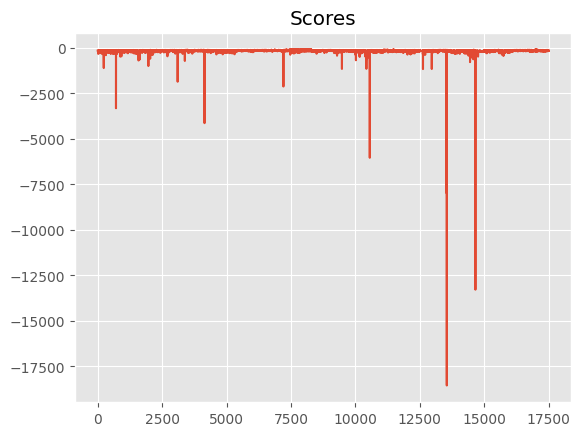

In [16]:
# Plot scores obtained per episode
plt.plot(scores[2500:]); plt.title("Scores");

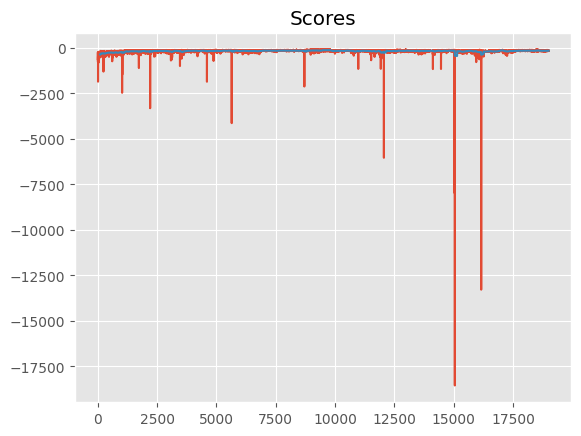

In [17]:
def plot_scores(scores, rolling_window=100):
    """Plot scores and optional rolling mean using specified window."""
    plt.plot(scores); plt.title("Scores");
    rolling_mean = pd.Series(scores).rolling(rolling_window).mean()
    plt.plot(rolling_mean);
    return rolling_mean

rolling_mean = plot_scores(scores[1000:])

100%|██████████| 100/100 [00:00<00:00, 126.66it/s]


[TEST] Completed 100 episodes with avg. score = -150.0


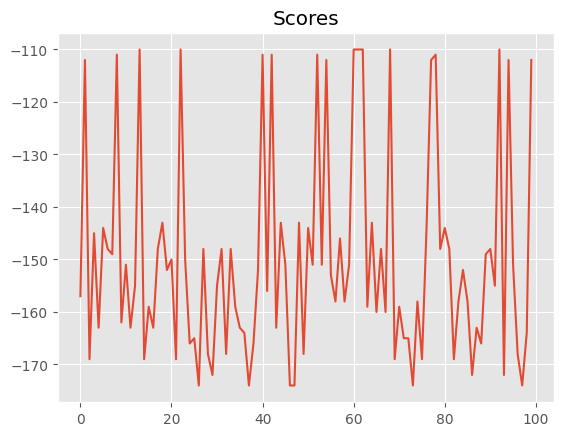

In [18]:
# Run in test mode and analyze scores obtained
test_scores = run(q_agent, env, num_episodes=100, mode='test')
print("[TEST] Completed {} episodes with avg. score = {}".format(len(test_scores), np.mean(test_scores)))
_ = plot_scores(test_scores)

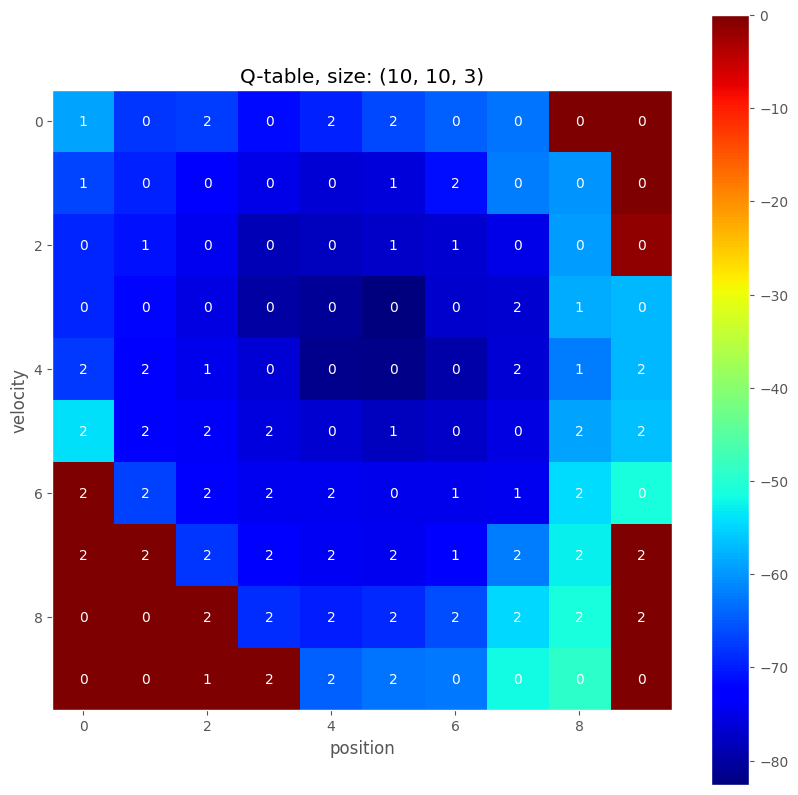

In [19]:
def plot_q_table(q_table):
    """Visualize max Q-value for each state and corresponding action."""
    q_image = np.max(q_table, axis=2)       # max Q-value for each state
    q_actions = np.argmax(q_table, axis=2)  # best action for each state

    fig, ax = plt.subplots(figsize=(10, 10))
    cax = ax.imshow(q_image, cmap='jet');
    cbar = fig.colorbar(cax)
    for x in range(q_image.shape[0]):
        for y in range(q_image.shape[1]):
            ax.text(x, y, q_actions[x, y], color='white',
                    horizontalalignment='center', verticalalignment='center')
    ax.grid(False)
    ax.set_title("Q-table, size: {}".format(q_table.shape))
    ax.set_xlabel('position')
    ax.set_ylabel('velocity')


plot_q_table(q_agent.q_table)

In [20]:
# Create a new agent with a different state space grid
state_grid_new = create_uniform_grid(env.observation_space.low, env.observation_space.high, bins=(20, 20))
q_agent_new = QLearningAgent(env, state_grid_new)
q_agent_new.scores = []  # initialize a list to store scores for this agent

Uniform grid: [<low>, <high>] / <bins> => <splits>
    [-1.2000000476837158, 0.6000000238418579] / 20 => [-1.11000004 -1.02000004 -0.93000004 -0.84000003 -0.75000003 -0.66000003
 -0.57000002 -0.48000002 -0.39000002 -0.30000001 -0.21000001 -0.12
 -0.03        0.06        0.15000001  0.24000001  0.33000001  0.42000002
  0.51000002]
    [-0.07000000029802322, 0.07000000029802322] / 20 => [-0.063 -0.056 -0.049 -0.042 -0.035 -0.028 -0.021 -0.014 -0.007  0.
  0.007  0.014  0.021  0.028  0.035  0.042  0.049  0.056  0.063]
Environment: <TimeLimit<OrderEnforcing<PassiveEnvChecker<MountainCarEnv<MountainCar-v0>>>>>
State space size: (20, 20)
Action space size: 3
Q table size: (20, 20, 3)


  0%|          | 99/50000 [01:00<4:48:07,  2.89it/s] 

Episode 100/50000 | Max Average Score: -inf

  0%|          | 199/50000 [01:20<2:16:36,  6.08it/s]

Episode 200/50000 | Max Average Score: -4684.6

  1%|          | 299/50000 [01:31<1:07:12, 12.32it/s]

Episode 300/50000 | Max Average Score: -2229.89

  1%|          | 398/50000 [01:37<37:55, 21.80it/s]  

Episode 400/50000 | Max Average Score: -1256.41

  1%|          | 499/50000 [01:41<28:17, 29.16it/s]

Episode 500/50000 | Max Average Score: -924.41

  1%|          | 598/50000 [01:45<28:09, 29.23it/s]

Episode 600/50000 | Max Average Score: -705.5

  1%|▏         | 698/50000 [01:48<20:55, 39.28it/s]

Episode 700/50000 | Max Average Score: -570.0

  2%|▏         | 797/50000 [01:51<18:30, 44.31it/s]

Episode 800/50000 | Max Average Score: -498.15

  2%|▏         | 899/50000 [01:53<17:58, 45.51it/s]

Episode 900/50000 | Max Average Score: -407.7

  2%|▏         | 996/50000 [01:55<14:31, 56.22it/s]

Episode 1000/50000 | Max Average Score: -373.45

  2%|▏         | 1095/50000 [01:57<14:13, 57.30it/s]

Episode 1100/50000 | Max Average Score: -338.28

  2%|▏         | 1198/50000 [01:59<12:13, 66.57it/s]

Episode 1200/50000 | Max Average Score: -299.44

  3%|▎         | 1294/50000 [02:00<15:59, 50.78it/s]

Episode 1300/50000 | Max Average Score: -291.42

  3%|▎         | 1397/50000 [02:02<11:11, 72.41it/s]

Episode 1400/50000 | Max Average Score: -271.79

  3%|▎         | 1499/50000 [02:04<13:06, 61.67it/s]

Episode 1500/50000 | Max Average Score: -271.14

  3%|▎         | 1594/50000 [02:05<10:08, 79.51it/s]

Episode 1600/50000 | Max Average Score: -252.5

  3%|▎         | 1698/50000 [02:06<10:17, 78.21it/s]

Episode 1700/50000 | Max Average Score: -241.63

  4%|▎         | 1799/50000 [02:07<09:14, 86.90it/s]

Episode 1800/50000 | Max Average Score: -234.74

  4%|▍         | 1897/50000 [02:09<09:46, 82.03it/s]

Episode 1900/50000 | Max Average Score: -226.45

  4%|▍         | 1995/50000 [02:10<10:05, 79.24it/s]

Episode 2000/50000 | Max Average Score: -223.79

  4%|▍         | 2099/50000 [02:11<09:51, 80.97it/s]

Episode 2100/50000 | Max Average Score: -219.57

  4%|▍         | 2197/50000 [02:13<09:44, 81.81it/s]

Episode 2200/50000 | Max Average Score: -219.57

  5%|▍         | 2292/50000 [02:14<10:21, 76.79it/s]

Episode 2300/50000 | Max Average Score: -217.37

  5%|▍         | 2394/50000 [02:15<09:07, 86.88it/s]

Episode 2400/50000 | Max Average Score: -186.23

  5%|▍         | 2494/50000 [02:16<08:03, 98.30it/s] 

Episode 2500/50000 | Max Average Score: -178.99

  5%|▌         | 2597/50000 [02:17<09:50, 80.27it/s]

Episode 2600/50000 | Max Average Score: -178.99

  5%|▌         | 2691/50000 [02:18<10:10, 77.52it/s]

Episode 2700/50000 | Max Average Score: -178.99

  6%|▌         | 2790/50000 [02:20<07:41, 102.30it/s]

Episode 2800/50000 | Max Average Score: -178.99

  6%|▌         | 2891/50000 [02:21<06:59, 112.41it/s]

Episode 2900/50000 | Max Average Score: -178.99

  6%|▌         | 2999/50000 [02:22<06:58, 112.26it/s]

Episode 3000/50000 | Max Average Score: -174.45

  6%|▌         | 3087/50000 [02:22<06:33, 119.20it/s]

Episode 3100/50000 | Max Average Score: -174.45

  6%|▋         | 3199/50000 [02:23<06:33, 119.05it/s]

Episode 3200/50000 | Max Average Score: -164.69

  7%|▋         | 3299/50000 [02:24<07:08, 109.06it/s]

Episode 3300/50000 | Max Average Score: -164.69

  7%|▋         | 3395/50000 [02:25<06:54, 112.47it/s]

Episode 3400/50000 | Max Average Score: -164.69

  7%|▋         | 3496/50000 [02:26<06:58, 111.21it/s]

Episode 3500/50000 | Max Average Score: -164.69

  7%|▋         | 3596/50000 [02:27<06:33, 117.99it/s]

Episode 3600/50000 | Max Average Score: -164.69

  7%|▋         | 3693/50000 [02:28<07:17, 105.93it/s]

Episode 3700/50000 | Max Average Score: -164.69

  8%|▊         | 3795/50000 [02:29<06:38, 115.99it/s]

Episode 3800/50000 | Max Average Score: -164.69

  8%|▊         | 3889/50000 [02:29<06:21, 120.89it/s]

Episode 3900/50000 | Max Average Score: -164.69

  8%|▊         | 3995/50000 [02:30<06:32, 117.08it/s]

Episode 4000/50000 | Max Average Score: -164.69

  8%|▊         | 4099/50000 [02:31<06:17, 121.69it/s]

Episode 4100/50000 | Max Average Score: -164.69

  8%|▊         | 4199/50000 [02:32<06:49, 111.75it/s]

Episode 4200/50000 | Max Average Score: -164.69

  9%|▊         | 4298/50000 [02:33<07:07, 107.01it/s]

Episode 4300/50000 | Max Average Score: -164.69

  9%|▉         | 4389/50000 [02:34<07:18, 104.02it/s]

Episode 4400/50000 | Max Average Score: -164.69

  9%|▉         | 4489/50000 [02:35<06:52, 110.23it/s]

Episode 4500/50000 | Max Average Score: -164.69

  9%|▉         | 4596/50000 [02:36<06:12, 121.82it/s]

Episode 4600/50000 | Max Average Score: -164.69

  9%|▉         | 4698/50000 [02:37<07:24, 101.81it/s]

Episode 4700/50000 | Max Average Score: -164.69

 10%|▉         | 4799/50000 [02:38<07:17, 103.32it/s]

Episode 4800/50000 | Max Average Score: -164.69

 10%|▉         | 4892/50000 [02:38<05:44, 131.12it/s]

Episode 4900/50000 | Max Average Score: -162.27

 10%|▉         | 4996/50000 [02:39<05:14, 143.02it/s]

Episode 5000/50000 | Max Average Score: -156.75

 10%|█         | 5096/50000 [02:40<05:57, 125.54it/s]

Episode 5100/50000 | Max Average Score: -152.94

 10%|█         | 5187/50000 [02:41<06:12, 120.27it/s]

Episode 5200/50000 | Max Average Score: -152.94

 11%|█         | 5292/50000 [02:42<06:13, 119.82it/s]

Episode 5300/50000 | Max Average Score: -152.94

 11%|█         | 5387/50000 [02:42<06:18, 117.72it/s]

Episode 5400/50000 | Max Average Score: -152.94

 11%|█         | 5495/50000 [02:43<06:27, 114.88it/s]

Episode 5500/50000 | Max Average Score: -152.94

 11%|█         | 5598/50000 [02:44<05:52, 125.84it/s]

Episode 5600/50000 | Max Average Score: -152.94

 11%|█▏        | 5697/50000 [02:45<06:39, 110.97it/s]

Episode 5700/50000 | Max Average Score: -152.94

 12%|█▏        | 5788/50000 [02:46<05:53, 125.21it/s]

Episode 5800/50000 | Max Average Score: -152.94

 12%|█▏        | 5895/50000 [02:47<08:05, 90.87it/s] 

Episode 5900/50000 | Max Average Score: -152.94

 12%|█▏        | 5986/50000 [02:48<06:36, 110.95it/s]

Episode 6000/50000 | Max Average Score: -152.94

 12%|█▏        | 6085/50000 [02:49<05:34, 131.30it/s]

Episode 6100/50000 | Max Average Score: -150.82

 12%|█▏        | 6193/50000 [02:50<06:06, 119.61it/s]

Episode 6200/50000 | Max Average Score: -148.93

 13%|█▎        | 6293/50000 [02:50<05:35, 130.12it/s]

Episode 6300/50000 | Max Average Score: -147.65

 13%|█▎        | 6390/50000 [02:51<05:40, 128.05it/s]

Episode 6400/50000 | Max Average Score: -147.65

 13%|█▎        | 6487/50000 [02:52<06:10, 117.54it/s]

Episode 6500/50000 | Max Average Score: -147.65

 13%|█▎        | 6589/50000 [02:53<05:04, 142.43it/s]

Episode 6600/50000 | Max Average Score: -147.65

 13%|█▎        | 6698/50000 [02:53<05:12, 138.69it/s]

Episode 6700/50000 | Max Average Score: -146.82

 14%|█▎        | 6792/50000 [02:54<05:04, 141.67it/s]

Episode 6800/50000 | Max Average Score: -144.29

 14%|█▍        | 6897/50000 [02:55<05:09, 139.18it/s]

Episode 6900/50000 | Max Average Score: -144.29

 14%|█▍        | 6988/50000 [02:56<05:00, 143.34it/s]

Episode 7000/50000 | Max Average Score: -142.41

 14%|█▍        | 7098/50000 [02:56<05:04, 140.84it/s]

Episode 7100/50000 | Max Average Score: -142.35

 14%|█▍        | 7192/50000 [02:57<04:58, 143.32it/s]

Episode 7200/50000 | Max Average Score: -140.7

 15%|█▍        | 7293/50000 [02:58<05:09, 138.16it/s]

Episode 7300/50000 | Max Average Score: -140.7

 15%|█▍        | 7399/50000 [02:59<04:59, 142.13it/s]

Episode 7400/50000 | Max Average Score: -140.7

 15%|█▍        | 7494/50000 [02:59<04:56, 143.16it/s]

Episode 7500/50000 | Max Average Score: -136.16

 15%|█▌        | 7588/50000 [03:00<04:48, 146.84it/s]

Episode 7600/50000 | Max Average Score: -131.98

 15%|█▌        | 7696/50000 [03:01<05:14, 134.58it/s]

Episode 7700/50000 | Max Average Score: -131.98

 16%|█▌        | 7798/50000 [03:01<05:06, 137.52it/s]

Episode 7800/50000 | Max Average Score: -131.98

 16%|█▌        | 7892/50000 [03:02<04:40, 150.13it/s]

Episode 7900/50000 | Max Average Score: -131.98

 16%|█▌        | 7986/50000 [03:03<05:05, 137.52it/s]

Episode 8000/50000 | Max Average Score: -131.98

 16%|█▌        | 8092/50000 [03:04<05:06, 136.87it/s]

Episode 8100/50000 | Max Average Score: -131.98

 16%|█▋        | 8192/50000 [03:04<05:26, 128.11it/s]

Episode 8200/50000 | Max Average Score: -131.98

 17%|█▋        | 8292/50000 [03:05<04:50, 143.74it/s]

Episode 8300/50000 | Max Average Score: -131.98

 17%|█▋        | 8398/50000 [03:06<04:42, 147.51it/s]

Episode 8400/50000 | Max Average Score: -131.98

 17%|█▋        | 8486/50000 [03:07<05:25, 127.73it/s]

Episode 8500/50000 | Max Average Score: -131.98

 17%|█▋        | 8592/50000 [03:08<05:46, 119.50it/s]

Episode 8600/50000 | Max Average Score: -131.98

 17%|█▋        | 8698/50000 [03:08<06:11, 111.03it/s]

Episode 8700/50000 | Max Average Score: -131.98

 18%|█▊        | 8791/50000 [03:09<06:49, 100.69it/s]

Episode 8800/50000 | Max Average Score: -131.98

 18%|█▊        | 8899/50000 [03:10<06:19, 108.31it/s]

Episode 8900/50000 | Max Average Score: -131.98

 18%|█▊        | 8996/50000 [03:11<07:12, 94.78it/s] 

Episode 9000/50000 | Max Average Score: -131.98

 18%|█▊        | 9096/50000 [03:12<07:17, 93.57it/s] 

Episode 9100/50000 | Max Average Score: -131.98

 18%|█▊        | 9186/50000 [03:13<05:13, 130.01it/s]

Episode 9200/50000 | Max Average Score: -131.98

 19%|█▊        | 9285/50000 [03:14<05:09, 131.61it/s]

Episode 9300/50000 | Max Average Score: -131.98

 19%|█▉        | 9398/50000 [03:15<05:08, 131.53it/s]

Episode 9400/50000 | Max Average Score: -131.98

 19%|█▉        | 9492/50000 [03:16<05:35, 120.76it/s]

Episode 9500/50000 | Max Average Score: -131.98

 19%|█▉        | 9592/50000 [03:17<06:00, 112.22it/s]

Episode 9600/50000 | Max Average Score: -131.98

 19%|█▉        | 9689/50000 [03:17<04:51, 138.44it/s]

Episode 9700/50000 | Max Average Score: -131.98

 20%|█▉        | 9791/50000 [03:18<05:25, 123.68it/s]

Episode 9800/50000 | Max Average Score: -131.98

 20%|█▉        | 9886/50000 [03:19<05:01, 132.84it/s]

Episode 9900/50000 | Max Average Score: -131.98

 20%|█▉        | 9996/50000 [03:20<05:54, 112.99it/s]

Episode 10000/50000 | Max Average Score: -131.98

 20%|██        | 10099/50000 [03:21<05:55, 112.15it/s]

Episode 10100/50000 | Max Average Score: -131.98

 20%|██        | 10192/50000 [03:22<06:20, 104.62it/s]

Episode 10200/50000 | Max Average Score: -131.98

 21%|██        | 10298/50000 [03:23<06:11, 106.76it/s]

Episode 10300/50000 | Max Average Score: -131.98

 21%|██        | 10398/50000 [03:24<07:23, 89.33it/s] 

Episode 10400/50000 | Max Average Score: -131.98

 21%|██        | 10492/50000 [03:24<05:47, 113.73it/s]

Episode 10500/50000 | Max Average Score: -131.98

 21%|██        | 10596/50000 [03:26<06:06, 107.51it/s]

Episode 10600/50000 | Max Average Score: -131.98

 21%|██▏       | 10692/50000 [03:26<06:09, 106.40it/s]

Episode 10700/50000 | Max Average Score: -131.98

 22%|██▏       | 10791/50000 [03:27<05:47, 112.91it/s]

Episode 10800/50000 | Max Average Score: -131.98

 22%|██▏       | 10896/50000 [03:28<06:26, 101.06it/s]

Episode 10900/50000 | Max Average Score: -131.98

 22%|██▏       | 10996/50000 [03:29<06:18, 103.02it/s]

Episode 11000/50000 | Max Average Score: -131.98

 22%|██▏       | 11096/50000 [03:30<06:31, 99.34it/s] 

Episode 11100/50000 | Max Average Score: -131.98

 22%|██▏       | 11191/50000 [03:31<05:28, 118.15it/s]

Episode 11200/50000 | Max Average Score: -131.98

 23%|██▎       | 11297/50000 [03:32<05:43, 112.56it/s]

Episode 11300/50000 | Max Average Score: -131.98

 23%|██▎       | 11389/50000 [03:33<05:56, 108.33it/s]

Episode 11400/50000 | Max Average Score: -131.98

 23%|██▎       | 11493/50000 [03:34<05:31, 116.28it/s]

Episode 11500/50000 | Max Average Score: -131.98

 23%|██▎       | 11589/50000 [03:35<05:42, 112.02it/s]

Episode 11600/50000 | Max Average Score: -131.98

 23%|██▎       | 11696/50000 [03:36<05:15, 121.28it/s]

Episode 11700/50000 | Max Average Score: -131.98

 24%|██▎       | 11797/50000 [03:37<05:15, 121.21it/s]

Episode 11800/50000 | Max Average Score: -131.98

 24%|██▍       | 11892/50000 [03:37<05:19, 119.44it/s]

Episode 11900/50000 | Max Average Score: -131.98

 24%|██▍       | 11998/50000 [03:38<04:56, 128.07it/s]

Episode 12000/50000 | Max Average Score: -131.98

 24%|██▍       | 12092/50000 [03:39<05:02, 125.20it/s]

Episode 12100/50000 | Max Average Score: -131.98

 24%|██▍       | 12197/50000 [03:40<05:09, 122.06it/s]

Episode 12200/50000 | Max Average Score: -131.98

 25%|██▍       | 12295/50000 [03:41<05:39, 111.06it/s]

Episode 12300/50000 | Max Average Score: -131.98

 25%|██▍       | 12389/50000 [03:42<04:57, 126.62it/s]

Episode 12400/50000 | Max Average Score: -131.98

 25%|██▍       | 12494/50000 [03:43<05:17, 118.01it/s]

Episode 12500/50000 | Max Average Score: -131.98

 25%|██▌       | 12587/50000 [03:43<04:59, 125.05it/s]

Episode 12600/50000 | Max Average Score: -131.98

 25%|██▌       | 12693/50000 [03:44<05:50, 106.56it/s]

Episode 12700/50000 | Max Average Score: -131.98

 26%|██▌       | 12790/50000 [03:45<05:24, 114.68it/s]

Episode 12800/50000 | Max Average Score: -131.98

 26%|██▌       | 12895/50000 [03:46<04:57, 124.54it/s]

Episode 12900/50000 | Max Average Score: -131.98

 26%|██▌       | 12988/50000 [03:47<05:34, 110.62it/s]

Episode 13000/50000 | Max Average Score: -131.98

 26%|██▌       | 13088/50000 [03:48<05:25, 113.54it/s]

Episode 13100/50000 | Max Average Score: -131.98

 26%|██▋       | 13191/50000 [03:49<05:43, 107.12it/s]

Episode 13200/50000 | Max Average Score: -131.98

 27%|██▋       | 13290/50000 [03:50<05:30, 111.16it/s]

Episode 13300/50000 | Max Average Score: -131.98

 27%|██▋       | 13397/50000 [03:50<04:50, 125.89it/s]

Episode 13400/50000 | Max Average Score: -131.98

 27%|██▋       | 13498/50000 [03:51<04:50, 125.83it/s]

Episode 13500/50000 | Max Average Score: -131.98

 27%|██▋       | 13591/50000 [03:52<04:58, 121.98it/s]

Episode 13600/50000 | Max Average Score: -131.98

 27%|██▋       | 13688/50000 [03:53<04:43, 128.20it/s]

Episode 13700/50000 | Max Average Score: -131.98

 28%|██▊       | 13794/50000 [03:54<04:12, 143.62it/s]

Episode 13800/50000 | Max Average Score: -131.98

 28%|██▊       | 13884/50000 [03:54<04:21, 138.36it/s]

Episode 13900/50000 | Max Average Score: -131.98

 28%|██▊       | 13991/50000 [03:55<04:29, 133.44it/s]

Episode 14000/50000 | Max Average Score: -131.98

 28%|██▊       | 14091/50000 [03:56<04:28, 133.83it/s]

Episode 14100/50000 | Max Average Score: -131.98

 28%|██▊       | 14184/50000 [03:56<03:59, 149.24it/s]

Episode 14200/50000 | Max Average Score: -131.98

 29%|██▊       | 14288/50000 [03:57<04:36, 129.33it/s]

Episode 14300/50000 | Max Average Score: -131.98

 29%|██▉       | 14389/50000 [03:58<04:26, 133.65it/s]

Episode 14400/50000 | Max Average Score: -131.98

 29%|██▉       | 14490/50000 [03:59<04:23, 134.69it/s]

Episode 14500/50000 | Max Average Score: -131.98

 29%|██▉       | 14592/50000 [04:00<04:29, 131.20it/s]

Episode 14600/50000 | Max Average Score: -131.98

 29%|██▉       | 14693/50000 [04:00<04:39, 126.10it/s]

Episode 14700/50000 | Max Average Score: -131.98

 30%|██▉       | 14799/50000 [04:01<03:55, 149.22it/s]

Episode 14800/50000 | Max Average Score: -131.98

 30%|██▉       | 14895/50000 [04:02<04:55, 118.95it/s]

Episode 14900/50000 | Max Average Score: -130.73

 30%|██▉       | 14999/50000 [04:03<03:57, 147.45it/s]

Episode 15000/50000 | Max Average Score: -130.73

 30%|███       | 15088/50000 [04:03<04:35, 126.63it/s]

Episode 15100/50000 | Max Average Score: -130.73

 30%|███       | 15195/50000 [04:04<05:01, 115.37it/s]

Episode 15200/50000 | Max Average Score: -130.73

 31%|███       | 15295/50000 [04:05<05:21, 108.00it/s]

Episode 15300/50000 | Max Average Score: -130.73

 31%|███       | 15392/50000 [04:06<06:36, 87.19it/s] 

Episode 15400/50000 | Max Average Score: -130.73

 31%|███       | 15492/50000 [04:07<06:00, 95.74it/s]

Episode 15500/50000 | Max Average Score: -130.73

 31%|███       | 15591/50000 [04:08<05:40, 100.97it/s]

Episode 15600/50000 | Max Average Score: -130.73

 31%|███▏      | 15687/50000 [04:09<04:44, 120.68it/s]

Episode 15700/50000 | Max Average Score: -130.73

 32%|███▏      | 15799/50000 [04:10<04:52, 116.85it/s]

Episode 15800/50000 | Max Average Score: -130.73

 32%|███▏      | 15894/50000 [04:11<05:26, 104.41it/s]

Episode 15900/50000 | Max Average Score: -130.73

 32%|███▏      | 15990/50000 [04:12<04:47, 118.11it/s]

Episode 16000/50000 | Max Average Score: -130.73

 32%|███▏      | 16093/50000 [04:13<05:03, 111.85it/s]

Episode 16100/50000 | Max Average Score: -130.73

 32%|███▏      | 16195/50000 [04:14<04:32, 124.26it/s]

Episode 16200/50000 | Max Average Score: -130.73

 33%|███▎      | 16289/50000 [04:14<04:42, 119.19it/s]

Episode 16300/50000 | Max Average Score: -130.73

 33%|███▎      | 16389/50000 [04:15<05:05, 110.16it/s]

Episode 16400/50000 | Max Average Score: -130.73

 33%|███▎      | 16491/50000 [04:16<04:53, 113.98it/s]

Episode 16500/50000 | Max Average Score: -130.73

 33%|███▎      | 16589/50000 [04:17<04:38, 119.83it/s]

Episode 16600/50000 | Max Average Score: -130.73

 33%|███▎      | 16696/50000 [04:18<04:57, 112.00it/s]

Episode 16700/50000 | Max Average Score: -130.73

 34%|███▎      | 16793/50000 [04:19<05:15, 105.34it/s]

Episode 16800/50000 | Max Average Score: -130.73

 34%|███▍      | 16892/50000 [04:20<04:35, 120.02it/s]

Episode 16900/50000 | Max Average Score: -130.73

 34%|███▍      | 16999/50000 [04:21<04:51, 113.34it/s]

Episode 17000/50000 | Max Average Score: -130.73

 34%|███▍      | 17094/50000 [04:22<05:18, 103.31it/s]

Episode 17100/50000 | Max Average Score: -130.73

 34%|███▍      | 17190/50000 [04:23<04:38, 117.76it/s]

Episode 17200/50000 | Max Average Score: -130.73

 35%|███▍      | 17284/50000 [04:24<04:17, 126.98it/s]

Episode 17300/50000 | Max Average Score: -130.73

 35%|███▍      | 17395/50000 [04:24<05:07, 106.06it/s]

Episode 17400/50000 | Max Average Score: -130.73

 35%|███▍      | 17497/50000 [04:25<04:39, 116.45it/s]

Episode 17500/50000 | Max Average Score: -130.73

 35%|███▌      | 17585/50000 [04:26<04:23, 122.98it/s]

Episode 17600/50000 | Max Average Score: -130.73

 35%|███▌      | 17690/50000 [04:27<04:42, 114.47it/s]

Episode 17700/50000 | Max Average Score: -130.73

 36%|███▌      | 17786/50000 [04:28<03:56, 136.48it/s]

Episode 17800/50000 | Max Average Score: -130.73

 36%|███▌      | 17897/50000 [04:29<03:45, 142.06it/s]

Episode 17900/50000 | Max Average Score: -129.1

 36%|███▌      | 17995/50000 [04:29<04:26, 120.29it/s]

Episode 18000/50000 | Max Average Score: -129.1

 36%|███▌      | 18099/50000 [04:30<04:22, 121.52it/s]

Episode 18100/50000 | Max Average Score: -129.1

 36%|███▋      | 18188/50000 [04:31<03:46, 140.30it/s]

Episode 18200/50000 | Max Average Score: -129.1

 37%|███▋      | 18291/50000 [04:32<04:41, 112.76it/s]

Episode 18300/50000 | Max Average Score: -129.1

 37%|███▋      | 18394/50000 [04:33<04:35, 114.89it/s]

Episode 18400/50000 | Max Average Score: -129.1

 37%|███▋      | 18494/50000 [04:33<03:57, 132.45it/s]

Episode 18500/50000 | Max Average Score: -129.1

 37%|███▋      | 18598/50000 [04:34<03:34, 146.42it/s]

Episode 18600/50000 | Max Average Score: -129.1

 37%|███▋      | 18687/50000 [04:35<03:42, 140.55it/s]

Episode 18700/50000 | Max Average Score: -129.1

 38%|███▊      | 18788/50000 [04:36<03:43, 139.89it/s]

Episode 18800/50000 | Max Average Score: -129.1

 38%|███▊      | 18896/50000 [04:37<04:32, 114.10it/s]

Episode 18900/50000 | Max Average Score: -129.1

 38%|███▊      | 18986/50000 [04:37<03:26, 149.99it/s]

Episode 19000/50000 | Max Average Score: -129.1

 38%|███▊      | 19088/50000 [04:38<04:10, 123.47it/s]

Episode 19100/50000 | Max Average Score: -128.81

 38%|███▊      | 19189/50000 [04:39<03:32, 145.33it/s]

Episode 19200/50000 | Max Average Score: -128.81

 39%|███▊      | 19283/50000 [04:39<03:42, 138.16it/s]

Episode 19300/50000 | Max Average Score: -116.21

 39%|███▉      | 19383/50000 [04:40<03:16, 155.63it/s]

Episode 19400/50000 | Max Average Score: -114.68

 39%|███▉      | 19494/50000 [04:41<02:57, 171.99it/s]

Episode 19500/50000 | Max Average Score: -109.92

 39%|███▉      | 19585/50000 [04:41<03:03, 165.94it/s]

Episode 19600/50000 | Max Average Score: -109.17

 39%|███▉      | 19687/50000 [04:42<03:27, 146.37it/s]

Episode 19700/50000 | Max Average Score: -109.17

 40%|███▉      | 19790/50000 [04:43<03:00, 167.38it/s]

Episode 19800/50000 | Max Average Score: -109.17

 40%|███▉      | 19895/50000 [04:43<03:05, 162.21it/s]

Episode 19900/50000 | Max Average Score: -109.17

 40%|███▉      | 19998/50000 [04:44<03:34, 140.12it/s]

Episode 20000/50000 | Max Average Score: -109.17

 40%|████      | 20090/50000 [04:45<03:35, 138.49it/s]

Episode 20100/50000 | Max Average Score: -109.17

 40%|████      | 20188/50000 [04:45<03:14, 153.15it/s]

Episode 20200/50000 | Max Average Score: -109.17

 41%|████      | 20292/50000 [04:46<03:40, 135.02it/s]

Episode 20300/50000 | Max Average Score: -109.17

 41%|████      | 20389/50000 [04:47<03:59, 123.89it/s]

Episode 20400/50000 | Max Average Score: -109.17

 41%|████      | 20494/50000 [04:48<03:29, 140.92it/s]

Episode 20500/50000 | Max Average Score: -109.17

 41%|████      | 20598/50000 [04:49<03:54, 125.51it/s]

Episode 20600/50000 | Max Average Score: -109.17

 41%|████▏     | 20691/50000 [04:49<03:56, 124.03it/s]

Episode 20700/50000 | Max Average Score: -109.17

 42%|████▏     | 20799/50000 [04:50<03:49, 127.19it/s]

Episode 20800/50000 | Max Average Score: -109.17

 42%|████▏     | 20890/50000 [04:51<03:29, 138.85it/s]

Episode 20900/50000 | Max Average Score: -109.17

 42%|████▏     | 20988/50000 [04:51<03:08, 153.65it/s]

Episode 21000/50000 | Max Average Score: -109.17

 42%|████▏     | 21098/50000 [04:52<03:41, 130.54it/s]

Episode 21100/50000 | Max Average Score: -109.17

 42%|████▏     | 21199/50000 [04:53<03:40, 130.85it/s]

Episode 21200/50000 | Max Average Score: -109.17

 43%|████▎     | 21292/50000 [04:54<03:50, 124.52it/s]

Episode 21300/50000 | Max Average Score: -109.17

 43%|████▎     | 21396/50000 [04:55<03:22, 141.56it/s]

Episode 21400/50000 | Max Average Score: -109.17

 43%|████▎     | 21492/50000 [04:55<03:08, 151.29it/s]

Episode 21500/50000 | Max Average Score: -109.17

 43%|████▎     | 21593/50000 [04:56<02:54, 162.94it/s]

Episode 21600/50000 | Max Average Score: -109.17

 43%|████▎     | 21696/50000 [04:57<03:14, 145.50it/s]

Episode 21700/50000 | Max Average Score: -109.17

 44%|████▎     | 21792/50000 [04:57<03:10, 148.41it/s]

Episode 21800/50000 | Max Average Score: -109.17

 44%|████▍     | 21886/50000 [04:58<03:26, 136.24it/s]

Episode 21900/50000 | Max Average Score: -109.17

 44%|████▍     | 21993/50000 [04:59<03:10, 146.72it/s]

Episode 22000/50000 | Max Average Score: -109.17

 44%|████▍     | 22091/50000 [04:59<02:51, 162.27it/s]

Episode 22100/50000 | Max Average Score: -109.17

 44%|████▍     | 22194/50000 [05:00<03:11, 145.57it/s]

Episode 22200/50000 | Max Average Score: -109.17

 45%|████▍     | 22295/50000 [05:01<03:39, 126.13it/s]

Episode 22300/50000 | Max Average Score: -109.17

 45%|████▍     | 22385/50000 [05:02<03:13, 142.94it/s]

Episode 22400/50000 | Max Average Score: -109.17

 45%|████▍     | 22487/50000 [05:02<03:23, 135.47it/s]

Episode 22500/50000 | Max Average Score: -109.17

 45%|████▌     | 22587/50000 [05:03<03:18, 137.99it/s]

Episode 22600/50000 | Max Average Score: -109.17

 45%|████▌     | 22699/50000 [05:04<03:20, 136.18it/s]

Episode 22700/50000 | Max Average Score: -109.17

 46%|████▌     | 22798/50000 [05:05<03:43, 121.92it/s]

Episode 22800/50000 | Max Average Score: -109.17

 46%|████▌     | 22894/50000 [05:05<03:33, 126.71it/s]

Episode 22900/50000 | Max Average Score: -109.17

 46%|████▌     | 22987/50000 [05:06<03:23, 132.72it/s]

Episode 23000/50000 | Max Average Score: -109.17

 46%|████▌     | 23096/50000 [05:07<03:16, 136.95it/s]

Episode 23100/50000 | Max Average Score: -109.17

 46%|████▋     | 23185/50000 [05:08<03:15, 137.16it/s]

Episode 23200/50000 | Max Average Score: -109.17

 47%|████▋     | 23295/50000 [05:08<02:54, 153.07it/s]

Episode 23300/50000 | Max Average Score: -109.17

 47%|████▋     | 23399/50000 [05:09<03:17, 134.63it/s]

Episode 23400/50000 | Max Average Score: -109.17

 47%|████▋     | 23489/50000 [05:10<03:01, 145.78it/s]

Episode 23500/50000 | Max Average Score: -109.17

 47%|████▋     | 23598/50000 [05:11<03:11, 137.81it/s]

Episode 23600/50000 | Max Average Score: -109.17

 47%|████▋     | 23686/50000 [05:11<03:21, 130.59it/s]

Episode 23700/50000 | Max Average Score: -109.17

 48%|████▊     | 23793/50000 [05:12<03:01, 144.25it/s]

Episode 23800/50000 | Max Average Score: -109.17

 48%|████▊     | 23888/50000 [05:13<02:48, 154.87it/s]

Episode 23900/50000 | Max Average Score: -109.17

 48%|████▊     | 23984/50000 [05:13<02:49, 153.07it/s]

Episode 24000/50000 | Max Average Score: -109.17

 48%|████▊     | 24089/50000 [05:14<03:26, 125.46it/s]

Episode 24100/50000 | Max Average Score: -109.17

 48%|████▊     | 24192/50000 [05:15<03:05, 138.92it/s]

Episode 24200/50000 | Max Average Score: -109.17

 49%|████▊     | 24283/50000 [05:15<03:01, 141.47it/s]

Episode 24300/50000 | Max Average Score: -109.17

 49%|████▉     | 24389/50000 [05:16<03:17, 129.57it/s]

Episode 24400/50000 | Max Average Score: -109.17

 49%|████▉     | 24485/50000 [05:17<03:23, 125.53it/s]

Episode 24500/50000 | Max Average Score: -109.17

 49%|████▉     | 24591/50000 [05:18<03:07, 135.38it/s]

Episode 24600/50000 | Max Average Score: -109.17

 49%|████▉     | 24688/50000 [05:18<03:01, 139.15it/s]

Episode 24700/50000 | Max Average Score: -109.17

 50%|████▉     | 24798/50000 [05:19<02:52, 145.97it/s]

Episode 24800/50000 | Max Average Score: -109.17

 50%|████▉     | 24886/50000 [05:20<02:30, 167.38it/s]

Episode 24900/50000 | Max Average Score: -109.17

 50%|████▉     | 24980/50000 [05:20<02:23, 174.70it/s]

Episode 25000/50000 | Max Average Score: -109.17

 50%|█████     | 25091/50000 [05:21<02:27, 169.30it/s]

Episode 25100/50000 | Max Average Score: -109.17

 50%|█████     | 25190/50000 [05:22<02:49, 146.30it/s]

Episode 25200/50000 | Max Average Score: -109.17

 51%|█████     | 25287/50000 [05:22<02:41, 152.75it/s]

Episode 25300/50000 | Max Average Score: -109.17

 51%|█████     | 25387/50000 [05:23<02:35, 158.38it/s]

Episode 25400/50000 | Max Average Score: -109.17

 51%|█████     | 25489/50000 [05:24<03:33, 114.59it/s]

Episode 25500/50000 | Max Average Score: -109.17

 51%|█████     | 25589/50000 [05:25<02:55, 138.74it/s]

Episode 25600/50000 | Max Average Score: -109.17

 51%|█████▏    | 25696/50000 [05:25<02:46, 146.34it/s]

Episode 25700/50000 | Max Average Score: -109.17

 52%|█████▏    | 25786/50000 [05:26<02:56, 137.09it/s]

Episode 25800/50000 | Max Average Score: -109.17

 52%|█████▏    | 25895/50000 [05:27<02:59, 134.47it/s]

Episode 25900/50000 | Max Average Score: -109.17

 52%|█████▏    | 25999/50000 [05:28<02:59, 133.79it/s]

Episode 26000/50000 | Max Average Score: -109.17

 52%|█████▏    | 26099/50000 [05:28<02:57, 134.64it/s]

Episode 26100/50000 | Max Average Score: -109.17

 52%|█████▏    | 26188/50000 [05:29<02:57, 134.24it/s]

Episode 26200/50000 | Max Average Score: -109.17

 53%|█████▎    | 26286/50000 [05:30<03:02, 130.21it/s]

Episode 26300/50000 | Max Average Score: -109.17

 53%|█████▎    | 26392/50000 [05:31<02:50, 138.09it/s]

Episode 26400/50000 | Max Average Score: -109.17

 53%|█████▎    | 26498/50000 [05:31<02:40, 146.11it/s]

Episode 26500/50000 | Max Average Score: -109.17

 53%|█████▎    | 26585/50000 [05:32<02:51, 136.17it/s]

Episode 26600/50000 | Max Average Score: -109.17

 53%|█████▎    | 26691/50000 [05:33<02:51, 136.00it/s]

Episode 26700/50000 | Max Average Score: -109.17

 54%|█████▎    | 26793/50000 [05:34<02:46, 139.26it/s]

Episode 26800/50000 | Max Average Score: -109.17

 54%|█████▍    | 26899/50000 [05:34<02:34, 149.26it/s]

Episode 26900/50000 | Max Average Score: -109.17

 54%|█████▍    | 26990/50000 [05:35<02:54, 132.12it/s]

Episode 27000/50000 | Max Average Score: -109.17

 54%|█████▍    | 27092/50000 [05:36<02:43, 140.05it/s]

Episode 27100/50000 | Max Average Score: -109.17

 54%|█████▍    | 27199/50000 [05:37<02:44, 138.63it/s]

Episode 27200/50000 | Max Average Score: -109.17

 55%|█████▍    | 27294/50000 [05:37<02:28, 152.87it/s]

Episode 27300/50000 | Max Average Score: -109.17

 55%|█████▍    | 27390/50000 [05:38<02:27, 153.71it/s]

Episode 27400/50000 | Max Average Score: -109.17

 55%|█████▍    | 27486/50000 [05:39<02:29, 150.88it/s]

Episode 27500/50000 | Max Average Score: -109.17

 55%|█████▌    | 27597/50000 [05:39<02:37, 142.66it/s]

Episode 27600/50000 | Max Average Score: -109.17

 55%|█████▌    | 27688/50000 [05:40<02:39, 140.20it/s]

Episode 27700/50000 | Max Average Score: -109.17

 56%|█████▌    | 27795/50000 [05:41<02:36, 141.94it/s]

Episode 27800/50000 | Max Average Score: -109.17

 56%|█████▌    | 27895/50000 [05:42<02:46, 132.60it/s]

Episode 27900/50000 | Max Average Score: -109.17

 56%|█████▌    | 27990/50000 [05:42<02:31, 144.87it/s]

Episode 28000/50000 | Max Average Score: -109.17

 56%|█████▌    | 28088/50000 [05:43<02:24, 151.83it/s]

Episode 28100/50000 | Max Average Score: -109.17

 56%|█████▋    | 28184/50000 [05:44<02:23, 151.73it/s]

Episode 28200/50000 | Max Average Score: -109.17

 57%|█████▋    | 28288/50000 [05:44<02:08, 168.62it/s]

Episode 28300/50000 | Max Average Score: -109.17

 57%|█████▋    | 28392/50000 [05:45<02:17, 157.72it/s]

Episode 28400/50000 | Max Average Score: -109.17

 57%|█████▋    | 28495/50000 [05:45<02:14, 159.68it/s]

Episode 28500/50000 | Max Average Score: -109.17

 57%|█████▋    | 28592/50000 [05:46<02:34, 138.77it/s]

Episode 28600/50000 | Max Average Score: -109.17

 57%|█████▋    | 28689/50000 [05:47<02:51, 124.44it/s]

Episode 28700/50000 | Max Average Score: -109.17

 58%|█████▊    | 28789/50000 [05:48<02:47, 126.49it/s]

Episode 28800/50000 | Max Average Score: -109.17

 58%|█████▊    | 28892/50000 [05:49<02:27, 143.16it/s]

Episode 28900/50000 | Max Average Score: -109.17

 58%|█████▊    | 28988/50000 [05:49<02:20, 149.64it/s]

Episode 29000/50000 | Max Average Score: -109.17

 58%|█████▊    | 29089/50000 [05:50<02:47, 124.60it/s]

Episode 29100/50000 | Max Average Score: -109.17

 58%|█████▊    | 29195/50000 [05:51<02:56, 117.64it/s]

Episode 29200/50000 | Max Average Score: -109.17

 59%|█████▊    | 29291/50000 [05:52<02:41, 127.98it/s]

Episode 29300/50000 | Max Average Score: -109.17

 59%|█████▉    | 29398/50000 [05:53<03:06, 110.21it/s]

Episode 29400/50000 | Max Average Score: -109.17

 59%|█████▉    | 29494/50000 [05:54<03:00, 113.47it/s]

Episode 29500/50000 | Max Average Score: -109.17

 59%|█████▉    | 29596/50000 [05:54<03:01, 112.58it/s]

Episode 29600/50000 | Max Average Score: -109.17

 59%|█████▉    | 29698/50000 [05:55<02:48, 120.76it/s]

Episode 29700/50000 | Max Average Score: -109.17

 60%|█████▉    | 29787/50000 [05:56<02:25, 138.87it/s]

Episode 29800/50000 | Max Average Score: -109.17

 60%|█████▉    | 29888/50000 [05:57<02:03, 162.26it/s]

Episode 29900/50000 | Max Average Score: -109.17

 60%|█████▉    | 29991/50000 [05:57<02:07, 156.93it/s]

Episode 30000/50000 | Max Average Score: -109.17

 60%|██████    | 30088/50000 [05:58<02:07, 156.31it/s]

Episode 30100/50000 | Max Average Score: -109.17

 60%|██████    | 30191/50000 [05:59<02:28, 133.03it/s]

Episode 30200/50000 | Max Average Score: -109.17

 61%|██████    | 30289/50000 [05:59<02:15, 145.49it/s]

Episode 30300/50000 | Max Average Score: -109.17

 61%|██████    | 30385/50000 [06:00<02:19, 141.00it/s]

Episode 30400/50000 | Max Average Score: -109.17

 61%|██████    | 30489/50000 [06:01<02:12, 147.71it/s]

Episode 30500/50000 | Max Average Score: -109.17

 61%|██████    | 30586/50000 [06:01<02:05, 154.64it/s]

Episode 30600/50000 | Max Average Score: -109.17

 61%|██████▏   | 30698/50000 [06:02<02:14, 143.22it/s]

Episode 30700/50000 | Max Average Score: -109.17

 62%|██████▏   | 30797/50000 [06:03<01:58, 161.77it/s]

Episode 30800/50000 | Max Average Score: -109.17

 62%|██████▏   | 30898/50000 [06:04<02:00, 158.72it/s]

Episode 30900/50000 | Max Average Score: -109.17

 62%|██████▏   | 30991/50000 [06:04<02:17, 138.42it/s]

Episode 31000/50000 | Max Average Score: -109.17

 62%|██████▏   | 31084/50000 [06:05<02:11, 144.39it/s]

Episode 31100/50000 | Max Average Score: -109.17

 62%|██████▏   | 31197/50000 [06:06<02:10, 143.54it/s]

Episode 31200/50000 | Max Average Score: -109.17

 63%|██████▎   | 31291/50000 [06:06<02:03, 152.05it/s]

Episode 31300/50000 | Max Average Score: -109.17

 63%|██████▎   | 31389/50000 [06:07<02:00, 154.31it/s]

Episode 31400/50000 | Max Average Score: -109.17

 63%|██████▎   | 31493/50000 [06:08<01:48, 170.47it/s]

Episode 31500/50000 | Max Average Score: -109.17

 63%|██████▎   | 31585/50000 [06:08<01:44, 175.64it/s]

Episode 31600/50000 | Max Average Score: -109.17

 63%|██████▎   | 31686/50000 [06:09<01:36, 189.00it/s]

Episode 31700/50000 | Max Average Score: -109.17

 64%|██████▎   | 31787/50000 [06:09<01:37, 187.44it/s]

Episode 31800/50000 | Max Average Score: -109.17

 64%|██████▍   | 31889/50000 [06:10<01:34, 192.12it/s]

Episode 31900/50000 | Max Average Score: -109.17

 64%|██████▍   | 31986/50000 [06:10<01:36, 186.68it/s]

Episode 32000/50000 | Max Average Score: -109.17

 64%|██████▍   | 32087/50000 [06:11<01:34, 190.06it/s]

Episode 32100/50000 | Max Average Score: -109.17

 64%|██████▍   | 32186/50000 [06:11<01:34, 189.35it/s]

Episode 32200/50000 | Max Average Score: -109.17

 65%|██████▍   | 32290/50000 [06:12<01:29, 197.42it/s]

Episode 32300/50000 | Max Average Score: -109.17

 65%|██████▍   | 32387/50000 [06:13<01:37, 180.06it/s]

Episode 32400/50000 | Max Average Score: -109.17

 65%|██████▍   | 32484/50000 [06:13<01:34, 185.92it/s]

Episode 32500/50000 | Max Average Score: -109.17

 65%|██████▌   | 32584/50000 [06:14<01:34, 184.74it/s]

Episode 32600/50000 | Max Average Score: -109.17

 65%|██████▌   | 32685/50000 [06:14<01:31, 190.06it/s]

Episode 32700/50000 | Max Average Score: -109.17

 66%|██████▌   | 32781/50000 [06:15<01:40, 171.13it/s]

Episode 32800/50000 | Max Average Score: -109.17

 66%|██████▌   | 32883/50000 [06:15<01:30, 190.18it/s]

Episode 32900/50000 | Max Average Score: -109.17

 66%|██████▌   | 32985/50000 [06:16<01:29, 189.99it/s]

Episode 33000/50000 | Max Average Score: -109.17

 66%|██████▌   | 33086/50000 [06:16<01:28, 191.32it/s]

Episode 33100/50000 | Max Average Score: -109.17

 66%|██████▋   | 33188/50000 [06:17<01:29, 188.77it/s]

Episode 33200/50000 | Max Average Score: -109.17

 67%|██████▋   | 33289/50000 [06:17<01:25, 195.06it/s]

Episode 33300/50000 | Max Average Score: -109.17

 67%|██████▋   | 33389/50000 [06:18<01:27, 189.57it/s]

Episode 33400/50000 | Max Average Score: -109.17

 67%|██████▋   | 33486/50000 [06:19<01:29, 183.50it/s]

Episode 33500/50000 | Max Average Score: -109.17

 67%|██████▋   | 33590/50000 [06:19<01:24, 194.96it/s]

Episode 33600/50000 | Max Average Score: -109.17

 67%|██████▋   | 33693/50000 [06:20<01:24, 192.50it/s]

Episode 33700/50000 | Max Average Score: -109.17

 68%|██████▊   | 33792/50000 [06:20<01:27, 184.39it/s]

Episode 33800/50000 | Max Average Score: -109.17

 68%|██████▊   | 33889/50000 [06:21<01:27, 183.58it/s]

Episode 33900/50000 | Max Average Score: -108.85

 68%|██████▊   | 33990/50000 [06:21<01:22, 194.26it/s]

Episode 34000/50000 | Max Average Score: -108.85

 68%|██████▊   | 34089/50000 [06:22<01:26, 184.31it/s]

Episode 34100/50000 | Max Average Score: -108.85

 68%|██████▊   | 34188/50000 [06:22<01:22, 192.63it/s]

Episode 34200/50000 | Max Average Score: -108.85

 69%|██████▊   | 34288/50000 [06:23<01:25, 183.46it/s]

Episode 34300/50000 | Max Average Score: -108.85

 69%|██████▉   | 34399/50000 [06:24<01:29, 174.01it/s]

Episode 34400/50000 | Max Average Score: -108.85

 69%|██████▉   | 34490/50000 [06:24<01:29, 174.07it/s]

Episode 34500/50000 | Max Average Score: -108.85

 69%|██████▉   | 34597/50000 [06:25<01:31, 167.87it/s]

Episode 34600/50000 | Max Average Score: -108.85

 69%|██████▉   | 34691/50000 [06:25<01:30, 168.92it/s]

Episode 34700/50000 | Max Average Score: -108.85

 70%|██████▉   | 34797/50000 [06:26<01:31, 165.51it/s]

Episode 34800/50000 | Max Average Score: -108.85

 70%|██████▉   | 34883/50000 [06:27<01:34, 160.81it/s]

Episode 34900/50000 | Max Average Score: -108.85

 70%|██████▉   | 34991/50000 [06:27<01:27, 171.38it/s]

Episode 35000/50000 | Max Average Score: -108.85

 70%|███████   | 35080/50000 [06:28<01:28, 168.72it/s]

Episode 35100/50000 | Max Average Score: -108.85

 70%|███████   | 35189/50000 [06:28<01:28, 168.24it/s]

Episode 35200/50000 | Max Average Score: -108.85

 71%|███████   | 35280/50000 [06:29<01:25, 172.28it/s]

Episode 35300/50000 | Max Average Score: -108.85

 71%|███████   | 35397/50000 [06:30<01:18, 185.77it/s]

Episode 35400/50000 | Max Average Score: -108.85

 71%|███████   | 35492/50000 [06:30<01:21, 178.01it/s]

Episode 35500/50000 | Max Average Score: -108.85

 71%|███████   | 35584/50000 [06:31<01:27, 164.18it/s]

Episode 35600/50000 | Max Average Score: -108.85

 71%|███████▏  | 35678/50000 [06:31<01:22, 173.59it/s]

Episode 35700/50000 | Max Average Score: -108.85

 72%|███████▏  | 35792/50000 [06:32<01:22, 172.71it/s]

Episode 35800/50000 | Max Average Score: -108.85

 72%|███████▏  | 35888/50000 [06:33<01:17, 182.90it/s]

Episode 35900/50000 | Max Average Score: -108.85

 72%|███████▏  | 35996/50000 [06:33<01:24, 166.70it/s]

Episode 36000/50000 | Max Average Score: -108.85

 72%|███████▏  | 36083/50000 [06:34<01:25, 162.44it/s]

Episode 36100/50000 | Max Average Score: -108.85

 72%|███████▏  | 36198/50000 [06:35<01:32, 149.35it/s]

Episode 36200/50000 | Max Average Score: -108.85

 73%|███████▎  | 36299/50000 [06:35<01:30, 151.14it/s]

Episode 36300/50000 | Max Average Score: -108.85

 73%|███████▎  | 36389/50000 [06:36<01:18, 173.93it/s]

Episode 36400/50000 | Max Average Score: -108.85

 73%|███████▎  | 36482/50000 [06:36<01:16, 176.13it/s]

Episode 36500/50000 | Max Average Score: -108.85

 73%|███████▎  | 36591/50000 [06:37<01:21, 164.50it/s]

Episode 36600/50000 | Max Average Score: -108.85

 73%|███████▎  | 36685/50000 [06:38<01:12, 184.13it/s]

Episode 36700/50000 | Max Average Score: -108.85

 74%|███████▎  | 36799/50000 [06:38<01:15, 174.03it/s]

Episode 36800/50000 | Max Average Score: -108.85

 74%|███████▍  | 36892/50000 [06:39<01:16, 172.26it/s]

Episode 36900/50000 | Max Average Score: -108.85

 74%|███████▍  | 36999/50000 [06:40<01:17, 167.46it/s]

Episode 37000/50000 | Max Average Score: -108.85

 74%|███████▍  | 37086/50000 [06:40<01:19, 162.88it/s]

Episode 37100/50000 | Max Average Score: -108.85

 74%|███████▍  | 37191/50000 [06:41<01:18, 163.32it/s]

Episode 37200/50000 | Max Average Score: -108.85

 75%|███████▍  | 37291/50000 [06:41<01:19, 159.85it/s]

Episode 37300/50000 | Max Average Score: -108.85

 75%|███████▍  | 37387/50000 [06:42<01:25, 148.27it/s]

Episode 37400/50000 | Max Average Score: -108.85

 75%|███████▍  | 37488/50000 [06:43<01:20, 154.81it/s]

Episode 37500/50000 | Max Average Score: -108.85

 75%|███████▌  | 37588/50000 [06:43<01:26, 143.98it/s]

Episode 37600/50000 | Max Average Score: -108.85

 75%|███████▌  | 37690/50000 [06:44<01:19, 153.93it/s]

Episode 37700/50000 | Max Average Score: -108.85

 76%|███████▌  | 37798/50000 [06:45<01:09, 174.88it/s]

Episode 37800/50000 | Max Average Score: -108.85

 76%|███████▌  | 37890/50000 [06:45<01:10, 171.86it/s]

Episode 37900/50000 | Max Average Score: -108.85

 76%|███████▌  | 37983/50000 [06:46<01:11, 167.30it/s]

Episode 38000/50000 | Max Average Score: -108.85

 76%|███████▌  | 38090/50000 [06:47<01:11, 166.07it/s]

Episode 38100/50000 | Max Average Score: -108.85

 76%|███████▋  | 38189/50000 [06:47<01:22, 143.44it/s]

Episode 38200/50000 | Max Average Score: -108.85

 77%|███████▋  | 38289/50000 [06:48<01:16, 152.38it/s]

Episode 38300/50000 | Max Average Score: -108.85

 77%|███████▋  | 38390/50000 [06:49<01:11, 161.97it/s]

Episode 38400/50000 | Max Average Score: -108.85

 77%|███████▋  | 38488/50000 [06:49<01:16, 149.64it/s]

Episode 38500/50000 | Max Average Score: -108.85

 77%|███████▋  | 38594/50000 [06:50<01:07, 169.57it/s]

Episode 38600/50000 | Max Average Score: -108.85

 77%|███████▋  | 38699/50000 [06:51<01:16, 148.17it/s]

Episode 38700/50000 | Max Average Score: -108.85

 78%|███████▊  | 38798/50000 [06:51<01:08, 162.67it/s]

Episode 38800/50000 | Max Average Score: -108.85

 78%|███████▊  | 38885/50000 [06:52<01:08, 161.32it/s]

Episode 38900/50000 | Max Average Score: -108.85

 78%|███████▊  | 38987/50000 [06:52<01:15, 145.40it/s]

Episode 39000/50000 | Max Average Score: -108.85

 78%|███████▊  | 39083/50000 [06:53<01:15, 144.74it/s]

Episode 39100/50000 | Max Average Score: -108.85

 78%|███████▊  | 39188/50000 [06:54<01:05, 166.31it/s]

Episode 39200/50000 | Max Average Score: -108.85

 79%|███████▊  | 39285/50000 [06:54<01:14, 144.67it/s]

Episode 39300/50000 | Max Average Score: -108.85

 79%|███████▉  | 39392/50000 [06:55<01:12, 147.11it/s]

Episode 39400/50000 | Max Average Score: -108.85

 79%|███████▉  | 39488/50000 [06:56<01:08, 152.77it/s]

Episode 39500/50000 | Max Average Score: -108.85

 79%|███████▉  | 39591/50000 [06:57<01:22, 125.54it/s]

Episode 39600/50000 | Max Average Score: -108.85

 79%|███████▉  | 39692/50000 [06:57<01:21, 126.40it/s]

Episode 39700/50000 | Max Average Score: -108.85

 80%|███████▉  | 39797/50000 [06:58<01:15, 135.79it/s]

Episode 39800/50000 | Max Average Score: -108.85

 80%|███████▉  | 39885/50000 [06:59<01:12, 138.83it/s]

Episode 39900/50000 | Max Average Score: -108.85

 80%|███████▉  | 39991/50000 [07:00<01:15, 133.25it/s]

Episode 40000/50000 | Max Average Score: -108.85

 80%|████████  | 40095/50000 [07:00<01:11, 138.19it/s]

Episode 40100/50000 | Max Average Score: -108.85

 80%|████████  | 40188/50000 [07:01<01:06, 148.47it/s]

Episode 40200/50000 | Max Average Score: -108.85

 81%|████████  | 40296/50000 [07:02<01:09, 139.59it/s]

Episode 40300/50000 | Max Average Score: -108.85

 81%|████████  | 40385/50000 [07:03<01:08, 140.98it/s]

Episode 40400/50000 | Max Average Score: -108.85

 81%|████████  | 40497/50000 [07:03<01:03, 150.54it/s]

Episode 40500/50000 | Max Average Score: -108.85

 81%|████████  | 40588/50000 [07:04<01:09, 136.00it/s]

Episode 40600/50000 | Max Average Score: -108.85

 81%|████████▏ | 40695/50000 [07:05<01:03, 145.62it/s]

Episode 40700/50000 | Max Average Score: -108.85

 82%|████████▏ | 40798/50000 [07:06<01:12, 126.60it/s]

Episode 40800/50000 | Max Average Score: -108.85

 82%|████████▏ | 40889/50000 [07:06<01:16, 118.66it/s]

Episode 40900/50000 | Max Average Score: -108.85

 82%|████████▏ | 40995/50000 [07:07<01:22, 108.69it/s]

Episode 41000/50000 | Max Average Score: -108.85

 82%|████████▏ | 41097/50000 [07:08<01:14, 119.01it/s]

Episode 41100/50000 | Max Average Score: -108.85

 82%|████████▏ | 41195/50000 [07:09<01:17, 113.32it/s]

Episode 41200/50000 | Max Average Score: -108.85

 83%|████████▎ | 41286/50000 [07:10<01:13, 118.32it/s]

Episode 41300/50000 | Max Average Score: -108.85

 83%|████████▎ | 41397/50000 [07:11<01:04, 133.24it/s]

Episode 41400/50000 | Max Average Score: -108.85

 83%|████████▎ | 41489/50000 [07:11<01:04, 131.47it/s]

Episode 41500/50000 | Max Average Score: -108.85

 83%|████████▎ | 41590/50000 [07:12<01:12, 115.76it/s]

Episode 41600/50000 | Max Average Score: -108.85

 83%|████████▎ | 41699/50000 [07:13<01:07, 122.87it/s]

Episode 41700/50000 | Max Average Score: -108.85

 84%|████████▎ | 41795/50000 [07:14<01:23, 98.36it/s] 

Episode 41800/50000 | Max Average Score: -108.85

 84%|████████▍ | 41889/50000 [07:15<01:15, 108.06it/s]

Episode 41900/50000 | Max Average Score: -108.85

 84%|████████▍ | 41989/50000 [07:16<01:07, 117.84it/s]

Episode 42000/50000 | Max Average Score: -108.85

 84%|████████▍ | 42093/50000 [07:17<01:13, 107.11it/s]

Episode 42100/50000 | Max Average Score: -108.85

 84%|████████▍ | 42194/50000 [07:18<01:01, 126.35it/s]

Episode 42200/50000 | Max Average Score: -108.85

 85%|████████▍ | 42287/50000 [07:19<01:00, 128.52it/s]

Episode 42300/50000 | Max Average Score: -108.85

 85%|████████▍ | 42398/50000 [07:20<00:59, 128.16it/s]

Episode 42400/50000 | Max Average Score: -108.85

 85%|████████▍ | 42497/50000 [07:20<00:52, 142.90it/s]

Episode 42500/50000 | Max Average Score: -108.85

 85%|████████▌ | 42595/50000 [07:21<00:46, 159.03it/s]

Episode 42600/50000 | Max Average Score: -108.85

 85%|████████▌ | 42688/50000 [07:22<00:51, 141.25it/s]

Episode 42700/50000 | Max Average Score: -108.85

 86%|████████▌ | 42787/50000 [07:22<00:44, 161.81it/s]

Episode 42800/50000 | Max Average Score: -108.85

 86%|████████▌ | 42884/50000 [07:23<00:48, 145.31it/s]

Episode 42900/50000 | Max Average Score: -108.85

 86%|████████▌ | 42988/50000 [07:24<00:54, 129.78it/s]

Episode 43000/50000 | Max Average Score: -108.85

 86%|████████▌ | 43090/50000 [07:25<00:48, 141.54it/s]

Episode 43100/50000 | Max Average Score: -108.85

 86%|████████▋ | 43187/50000 [07:25<00:55, 123.38it/s]

Episode 43200/50000 | Max Average Score: -108.85

 87%|████████▋ | 43297/50000 [07:26<00:50, 132.19it/s]

Episode 43300/50000 | Max Average Score: -108.85

 87%|████████▋ | 43398/50000 [07:27<00:48, 137.07it/s]

Episode 43400/50000 | Max Average Score: -108.85

 87%|████████▋ | 43486/50000 [07:28<00:45, 143.33it/s]

Episode 43500/50000 | Max Average Score: -108.85

 87%|████████▋ | 43595/50000 [07:28<00:43, 148.38it/s]

Episode 43600/50000 | Max Average Score: -108.85

 87%|████████▋ | 43688/50000 [07:29<00:41, 150.46it/s]

Episode 43700/50000 | Max Average Score: -108.85

 88%|████████▊ | 43794/50000 [07:30<00:45, 137.11it/s]

Episode 43800/50000 | Max Average Score: -108.85

 88%|████████▊ | 43897/50000 [07:31<00:44, 135.76it/s]

Episode 43900/50000 | Max Average Score: -108.85

 88%|████████▊ | 43987/50000 [07:31<00:42, 142.21it/s]

Episode 44000/50000 | Max Average Score: -108.85

 88%|████████▊ | 44088/50000 [07:32<00:48, 121.65it/s]

Episode 44100/50000 | Max Average Score: -108.85

 88%|████████▊ | 44196/50000 [07:33<00:43, 134.77it/s]

Episode 44200/50000 | Max Average Score: -108.85

 89%|████████▊ | 44288/50000 [07:34<00:51, 111.06it/s]

Episode 44300/50000 | Max Average Score: -108.85

 89%|████████▉ | 44397/50000 [07:35<00:58, 95.07it/s] 

Episode 44400/50000 | Max Average Score: -108.85

 89%|████████▉ | 44494/50000 [07:36<00:50, 108.90it/s]

Episode 44500/50000 | Max Average Score: -108.85

 89%|████████▉ | 44592/50000 [07:36<00:47, 112.99it/s]

Episode 44600/50000 | Max Average Score: -108.85

 89%|████████▉ | 44699/50000 [07:37<00:47, 111.55it/s]

Episode 44700/50000 | Max Average Score: -108.85

 90%|████████▉ | 44798/50000 [07:38<00:44, 117.09it/s]

Episode 44800/50000 | Max Average Score: -108.85

 90%|████████▉ | 44895/50000 [07:39<00:52, 96.81it/s] 

Episode 44900/50000 | Max Average Score: -108.85

 90%|████████▉ | 44997/50000 [07:40<00:47, 105.32it/s]

Episode 45000/50000 | Max Average Score: -108.85

 90%|█████████ | 45094/50000 [07:41<00:49, 99.09it/s] 

Episode 45100/50000 | Max Average Score: -108.85

 90%|█████████ | 45195/50000 [07:42<00:40, 119.68it/s]

Episode 45200/50000 | Max Average Score: -108.85

 91%|█████████ | 45291/50000 [07:43<00:44, 106.68it/s]

Episode 45300/50000 | Max Average Score: -108.85

 91%|█████████ | 45396/50000 [07:44<00:41, 111.89it/s]

Episode 45400/50000 | Max Average Score: -108.85

 91%|█████████ | 45489/50000 [07:45<00:42, 107.08it/s]

Episode 45500/50000 | Max Average Score: -108.85

 91%|█████████ | 45595/50000 [07:46<00:45, 97.09it/s] 

Episode 45600/50000 | Max Average Score: -108.85

 91%|█████████▏| 45690/50000 [07:47<00:37, 114.10it/s]

Episode 45700/50000 | Max Average Score: -108.85

 92%|█████████▏| 45794/50000 [07:48<00:29, 141.15it/s]

Episode 45800/50000 | Max Average Score: -108.85

 92%|█████████▏| 45896/50000 [07:48<00:29, 136.93it/s]

Episode 45900/50000 | Max Average Score: -108.85

 92%|█████████▏| 45990/50000 [07:49<00:25, 155.32it/s]

Episode 46000/50000 | Max Average Score: -108.85

 92%|█████████▏| 46089/50000 [07:50<00:25, 150.57it/s]

Episode 46100/50000 | Max Average Score: -108.85

 92%|█████████▏| 46195/50000 [07:51<00:28, 135.23it/s]

Episode 46200/50000 | Max Average Score: -108.85

 93%|█████████▎| 46285/50000 [07:51<00:25, 144.92it/s]

Episode 46300/50000 | Max Average Score: -108.85

 93%|█████████▎| 46391/50000 [07:52<00:25, 144.30it/s]

Episode 46400/50000 | Max Average Score: -108.85

 93%|█████████▎| 46486/50000 [07:53<00:23, 149.92it/s]

Episode 46500/50000 | Max Average Score: -108.85

 93%|█████████▎| 46589/50000 [07:53<00:25, 131.56it/s]

Episode 46600/50000 | Max Average Score: -108.85

 93%|█████████▎| 46695/50000 [07:54<00:29, 113.40it/s]

Episode 46700/50000 | Max Average Score: -108.85

 94%|█████████▎| 46796/50000 [07:55<00:29, 109.89it/s]

Episode 46800/50000 | Max Average Score: -108.85

 94%|█████████▍| 46893/50000 [07:56<00:27, 112.46it/s]

Episode 46900/50000 | Max Average Score: -108.85

 94%|█████████▍| 46998/50000 [07:57<00:26, 112.16it/s]

Episode 47000/50000 | Max Average Score: -108.85

 94%|█████████▍| 47098/50000 [07:58<00:28, 101.66it/s]

Episode 47100/50000 | Max Average Score: -108.85

 94%|█████████▍| 47198/50000 [07:59<00:28, 97.57it/s] 

Episode 47200/50000 | Max Average Score: -108.85

 95%|█████████▍| 47298/50000 [08:00<00:25, 104.97it/s]

Episode 47300/50000 | Max Average Score: -108.85

 95%|█████████▍| 47388/50000 [08:01<00:19, 132.97it/s]

Episode 47400/50000 | Max Average Score: -108.85

 95%|█████████▍| 47489/50000 [08:02<00:21, 119.17it/s]

Episode 47500/50000 | Max Average Score: -108.85

 95%|█████████▌| 47597/50000 [08:03<00:17, 134.72it/s]

Episode 47600/50000 | Max Average Score: -108.85

 95%|█████████▌| 47695/50000 [08:04<00:18, 127.86it/s]

Episode 47700/50000 | Max Average Score: -108.85

 96%|█████████▌| 47796/50000 [08:04<00:15, 139.37it/s]

Episode 47800/50000 | Max Average Score: -108.85

 96%|█████████▌| 47887/50000 [08:05<00:14, 145.50it/s]

Episode 47900/50000 | Max Average Score: -108.85

 96%|█████████▌| 47991/50000 [08:06<00:15, 133.07it/s]

Episode 48000/50000 | Max Average Score: -108.85

 96%|█████████▌| 48096/50000 [08:07<00:12, 148.03it/s]

Episode 48100/50000 | Max Average Score: -108.85

 96%|█████████▋| 48188/50000 [08:07<00:13, 135.29it/s]

Episode 48200/50000 | Max Average Score: -108.85

 97%|█████████▋| 48292/50000 [08:08<00:12, 139.51it/s]

Episode 48300/50000 | Max Average Score: -108.85

 97%|█████████▋| 48392/50000 [08:09<00:12, 123.86it/s]

Episode 48400/50000 | Max Average Score: -108.85

 97%|█████████▋| 48494/50000 [08:10<00:10, 138.79it/s]

Episode 48500/50000 | Max Average Score: -108.85

 97%|█████████▋| 48597/50000 [08:10<00:10, 127.91it/s]

Episode 48600/50000 | Max Average Score: -108.85

 97%|█████████▋| 48696/50000 [08:11<00:09, 130.70it/s]

Episode 48700/50000 | Max Average Score: -108.85

 98%|█████████▊| 48794/50000 [08:12<00:08, 136.16it/s]

Episode 48800/50000 | Max Average Score: -108.85

 98%|█████████▊| 48890/50000 [08:13<00:08, 125.36it/s]

Episode 48900/50000 | Max Average Score: -108.85

 98%|█████████▊| 48998/50000 [08:14<00:07, 126.75it/s]

Episode 49000/50000 | Max Average Score: -108.85

 98%|█████████▊| 49088/50000 [08:14<00:07, 117.90it/s]

Episode 49100/50000 | Max Average Score: -108.85

 98%|█████████▊| 49189/50000 [08:15<00:05, 136.37it/s]

Episode 49200/50000 | Max Average Score: -108.85

 99%|█████████▊| 49293/50000 [08:16<00:05, 139.93it/s]

Episode 49300/50000 | Max Average Score: -108.85

 99%|█████████▉| 49390/50000 [08:17<00:04, 122.05it/s]

Episode 49400/50000 | Max Average Score: -108.85

 99%|█████████▉| 49494/50000 [08:18<00:04, 113.96it/s]

Episode 49500/50000 | Max Average Score: -108.85

 99%|█████████▉| 49586/50000 [08:18<00:02, 149.60it/s]

Episode 49600/50000 | Max Average Score: -108.85

 99%|█████████▉| 49699/50000 [08:19<00:01, 150.71it/s]

Episode 49700/50000 | Max Average Score: -108.85

100%|█████████▉| 49788/50000 [08:20<00:01, 138.42it/s]

Episode 49800/50000 | Max Average Score: -108.85

100%|█████████▉| 49898/50000 [08:21<00:00, 123.29it/s]

Episode 49900/50000 | Max Average Score: -108.85

100%|█████████▉| 49994/50000 [08:21<00:00, 134.43it/s]

Episode 50000/50000 | Max Average Score: -108.85

100%|██████████| 50000/50000 [08:21<00:00, 99.63it/s] 


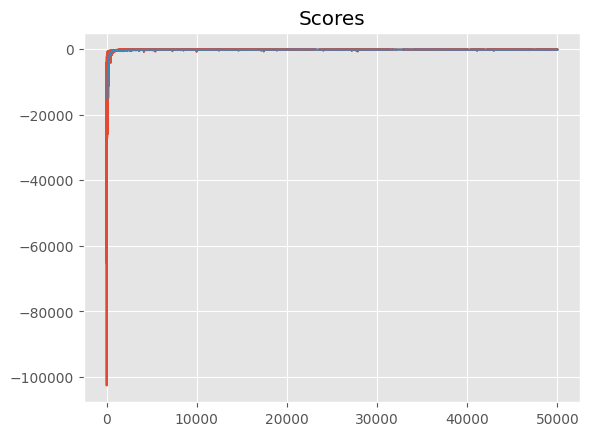

In [21]:
# Train it over a desired number of episodes and analyze scores
# Note: This cell can be run multiple times, and scores will get accumulated
q_agent_new.scores += run(q_agent_new, env, num_episodes=50000)  # accumulate scores
rolling_mean_new = plot_scores(q_agent_new.scores)

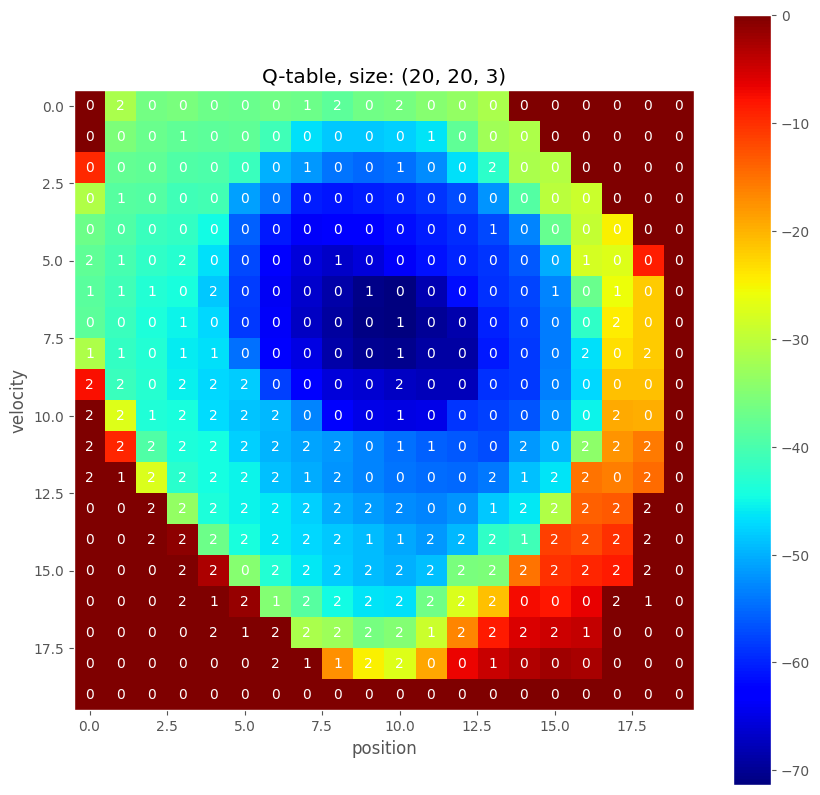

In [22]:
# Visualize the learned Q-table
plot_q_table(q_agent_new.q_table)

Score:  -160.0


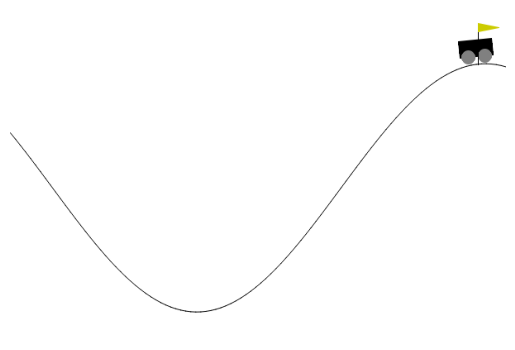

In [23]:
state = env.reset(seed=42)
score = 0
img = plt.imshow(env.render())
for t in range(1000):
    action = q_agent_new.act(state, mode='test')
    img.set_data(env.render())
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    state, reward, done, _, _ = env.step(action)
    score += reward
    if done:
        print('Score: ', score)
        break
        
env.close()